# EDA - 시각화

### Configuration

seaborn은 matplotlib을 기반으로 작동합니다. matplotlib에 비해 그래프의 스타일이 이쁘고, 약간의 통계 기능과 사용의 편의성 때문에 널리 쓰이고 있습니다. 하지만, seaborn을 호출하는 순간 matplotlib의 기본 스타일을 바꾸기 때문에 그래프의 모양이 바뀌는 것을 염두에 두셔야 합니다.

In [1]:
#matplotlib을 주피터 화면 내에 띄우도록 해주는 주피터 명령어
%matplotlib inline
import pandas as pd
#matplotlib을 이용해 그래프를 그릴 수 있는 pyplot (인터페이스 역할)과, 설정을 바꾸는데 사용되는 matplotlib 둘 다 import 합니다.
import matplotlib as mpl
import matplotlib.pyplot as plt
# seaborn은 matplotlib보다 더 이쁘고 쉽게 그래프를 그릴 수 있는 라이브러리입니다. matplotlib을 이용해 동작하고, 자유도는 matplotlib에 비해 낮습니다.
import seaborn as sns


pd.options.display.max_columns = 50

### Load Dataset

시각화 수업의 데이터는 대한민국 국민의 [2016년 건강검진 데이터](https://www.data.go.kr/dataset/15007122/fileData.do)을 이용하도록 하겠습니다. data 폴더에 제공된 '2016년_건강검진데이터.csv' 는 위 링크 주소의 2016년 대한민국 국민 100만명의 건강검진 데이터 중 실습을 위해 1000개만 샘플링한 데이터입니다. 원본 데이터는 노트북으로는 처리하는데 많은 시간이 들기 때문에 집에서 복습하실 때 다운받아 실습해보시길 바랍니다 :) 

In [2]:
data = pd.read_csv('health_2016.csv', nrows=1000)

print(data.shape)
data.head(3)

(1000, 34)


,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2016,465969,1,8,41,170.0,70.0,74.0,0.7,0.7,1.0,1.0,118.0,70.0,85.0,194.0,97.0,54.0,120.0,14.6,2.0,1.1,31.0,36.0,96.0,3.0,NaN,1,NaN,NaN,NaN,NaN,2.0,20171219
1,2016,565871,1,10,41,160.0,60.0,81.0,1.2,1.0,1.0,1.0,134.0,84.0,105.0,143.0,84.0,33.0,93.0,16.2,1.0,1.0,20.0,23.0,14.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20171219
2,2016,115718,2,11,11,160.0,55.0,71.0,1.0,1.0,1.0,1.0,129.0,85.0,86.0,203.0,52.0,51.0,141.0,14.0,1.0,0.8,17.0,14.0,20.0,1.0,NaN,1,NaN,NaN,NaN,NaN,0.0,20171219


### countplot

seaborn이 자유도가 낮기는 하지만, seaborn과 matplotlib을 조합해서 사용한다면 원하는 대부분의 그래프를 그릴 수 있습니다. 또한, seaborn이 가장 일반적으로 많이 쓰이는 시각화 툴이기 때문에 seaborn을 이용하여 시각화를 하도록 하겠습니다.


countplot을 그리기에 앞서, matplotlib은 한글 폰트를 지원하지 않기 때문에 폰트를 설정해주어야 합니다. 다음과 같은 명령어로 현재 사용 가능한 한글 폰트 경로와 파일명을 확인 할 수 있습니다.


In [3]:
font_list = mpl.font_manager.findSystemFonts(fontpaths='/Library/Fonts', fontext='ttf')
font_list

[]

위의 폰트 리스트 중 한글을 지원하는 폰트를 다음과 같이 설정해 주시면 됩니다.

In [4]:
font_name = mpl.font_manager.FontProperties(fname="/Library/Fonts/AppleGothic.ttf").get_name()
font_name

FileNotFoundError: [Errno 2] No such file or directory: '/Library/Fonts/AppleGothic.ttf'

In [7]:
# mac OS를 이용하고 있기 떄문에 AppleGothic을 설정했습니다.
# 윈도우의 경우 다른 폰트를 사용해주셔야 합니다. 나눔폰트가 있는 경우 'NanumGothic' 없는 경우에는 'Malgun Gothic'을 사용해주세요.
mpl.rc('font', family='NanumGothic')
# 별도로, 폰트를 바꿀 경우 마이너스가 표시되지 않는 경우도 있는데 이를 막아주는 코드입니다.
mpl.rc('axes', unicode_minus=False)

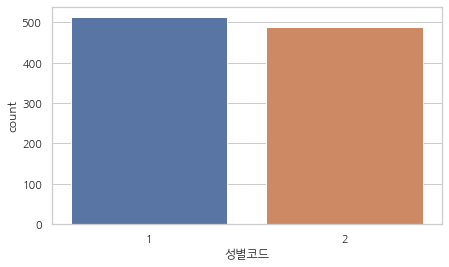

In [8]:
plt.figure(figsize=[7,4])

sns.countplot(x='성별코드', data=data)

글씨체가 조금 깨지는 것을 확인할 수 있습니다. 이는 matplotlib 그래프의 해상도를 높이는 방법으로 해결할 수 있습니다.

In [9]:
# retina 옵션을 통해 해상도를 올립니다.
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

#또는  %config InlineBackend.figure_format = 'retina' 사용 가능

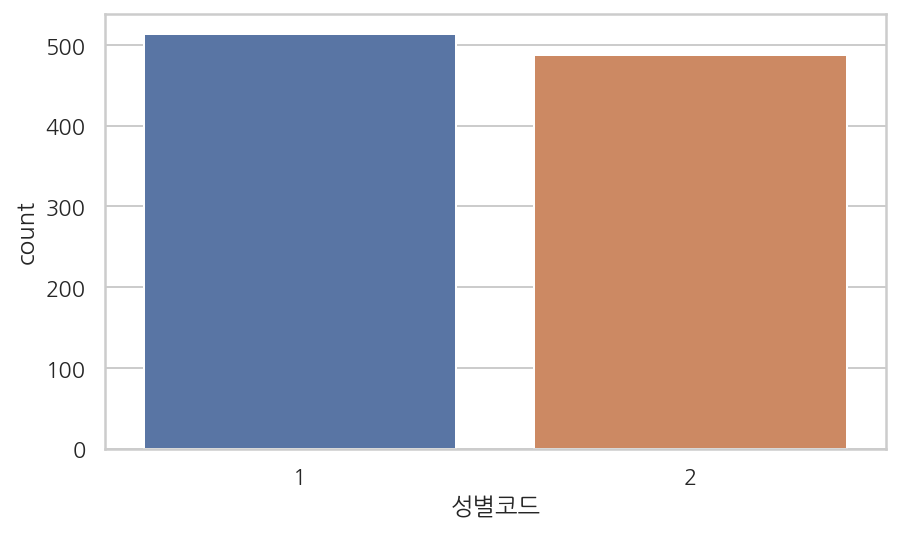

In [10]:
plt.figure(figsize=[7,4])
sns.countplot(x='성별코드', data=data)

또한, seaborn에는 내장된 그래프 스타일이 있습니다. `whitegrid`,`darkgrid`,`dark`,`white`,`ticks` 인데, 이는 취향에 맞게 골라 쓰시면 됩니다.

[상세한 스타일 세팅 방법](https://seaborn.pydata.org/tutorial/aesthetics.html)은 왼쪽의 링크를 통해 확인하실 수 있습니다.

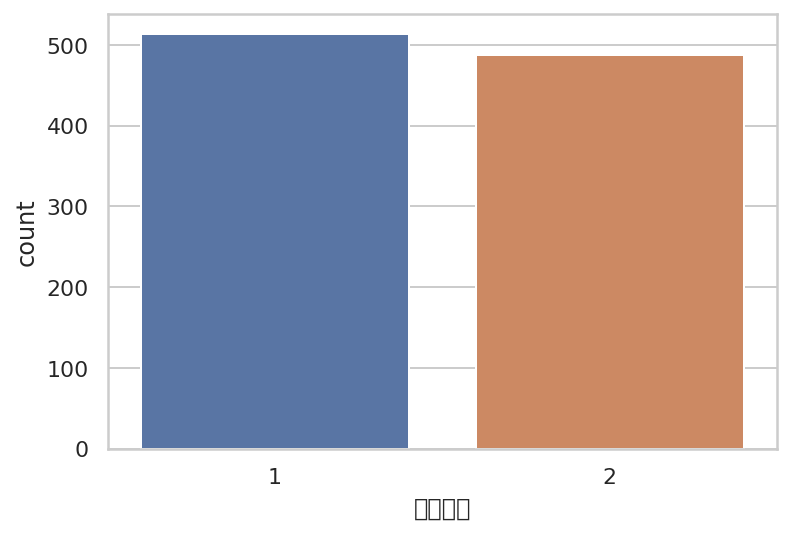

In [11]:
sns.set_style('whitegrid')
#style을 불러오는 경우 설정한 rcparameter(font, font size) 등이 리셋되기 때문에 다시 설정해주어야 합니다.
mpl.rc('font', family='AppleGothic')
mpl.rc('axes', unicode_minus=False)

sns.countplot(x='성별코드', data=data)

In [12]:
#수정할 수 있는 파라미터는 다음의 딕셔너리에서 볼 수 있습니다.
mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.8',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.format

[Matplotlib 상세 옵션](https://towardsdatascience.com/all-your-matplotlib-questions-answered-420dd95cb4ff)은 왼쪽에 링크에서 더 확인하실 수 있습니다.

### subplots

matplotlib의 subplots를 이용해 미리만들어둔 figure에 그래프가 어떤 모양으로 들어갈지 지정할 수 있습니다. 

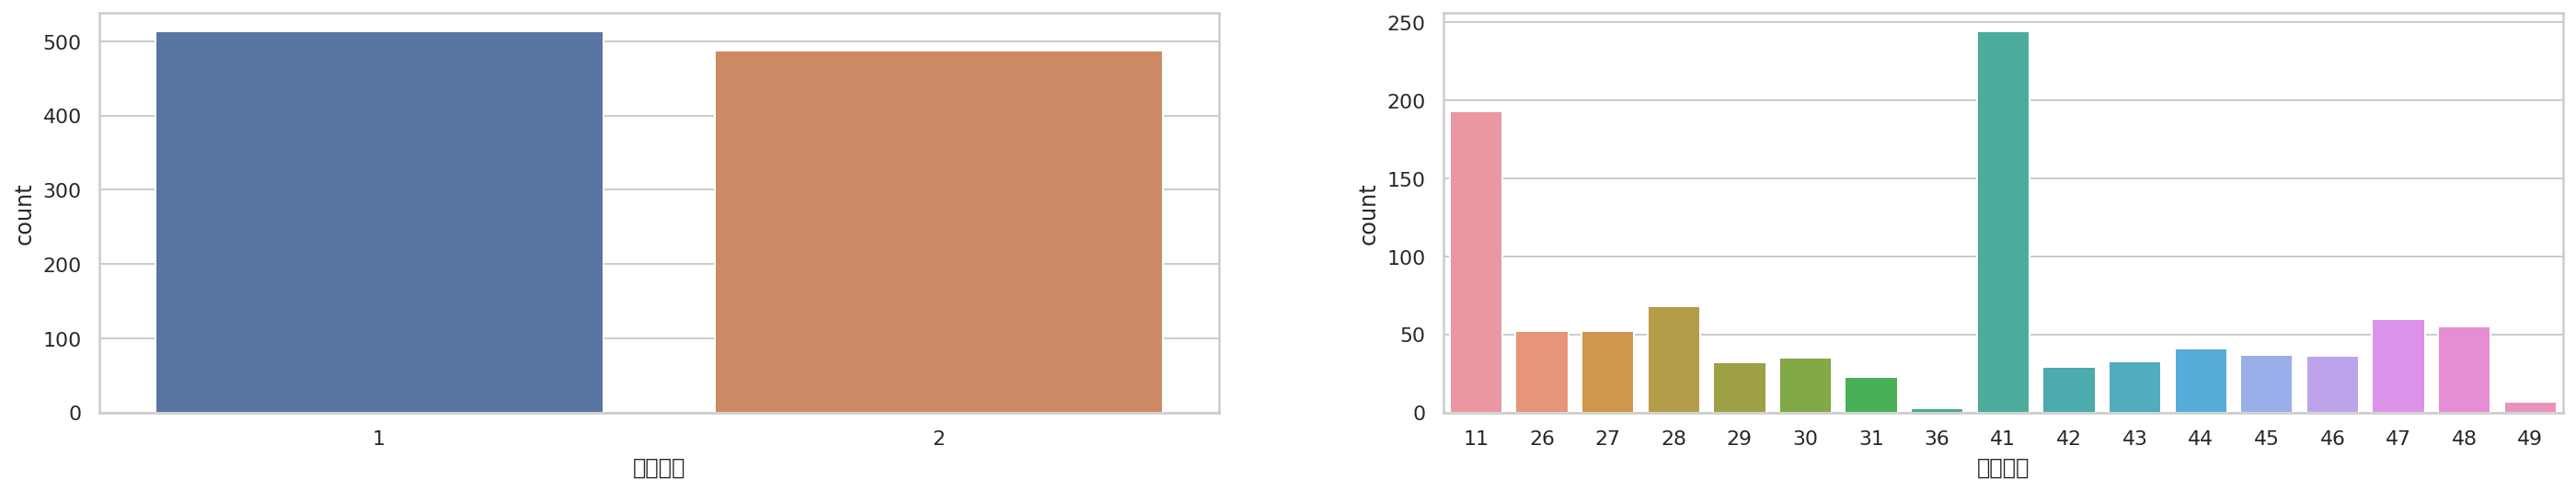

In [13]:
figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(24, 4)

sns.countplot(x="성별코드", data=data, ax=ax1)
sns.countplot(x="시도코드", data=data, ax=ax2)

### 칼라 선택하기

seaborn을 그래프의 색상을 직관적으로 바꿀 수 있습니다. 컴퓨터에게 색상을 입력시킬 때는 주로 RGB color value (Red, Green, Blue가 각각 0~255의 값을 가지는) 를 전달해야 하는데, matplotlib은 이를 쉽게 사용할 수 있도록 미리 지정을 해 놓았습니다. 색상표는 [다음의 링크](https://python-graph-gallery.com/100-calling-a-color-with-seaborn/)에서 확인하실 수 있습니다.

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


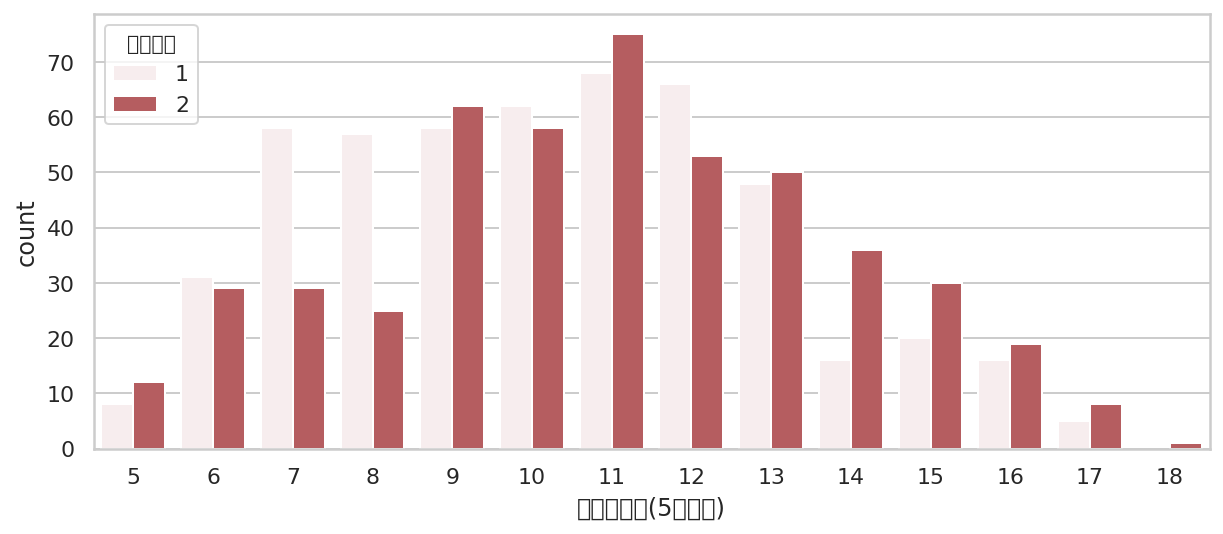

In [14]:
# plt.figure의 figsize를 이용해 특정 그래프의 사이즈를 지정할 수 있습니다. 그래프를 그리기 전에 입력해주세요.
plt.figure(figsize=[10,4])
sns.countplot(x='연령대코드(5세단위)', hue="성별코드", data=data, color='r')

[다음의 링크](https://www.w3schools.com/colors/colors_rgb.asp)에서 RGB 칼라를 만들어볼 수 있습니다.

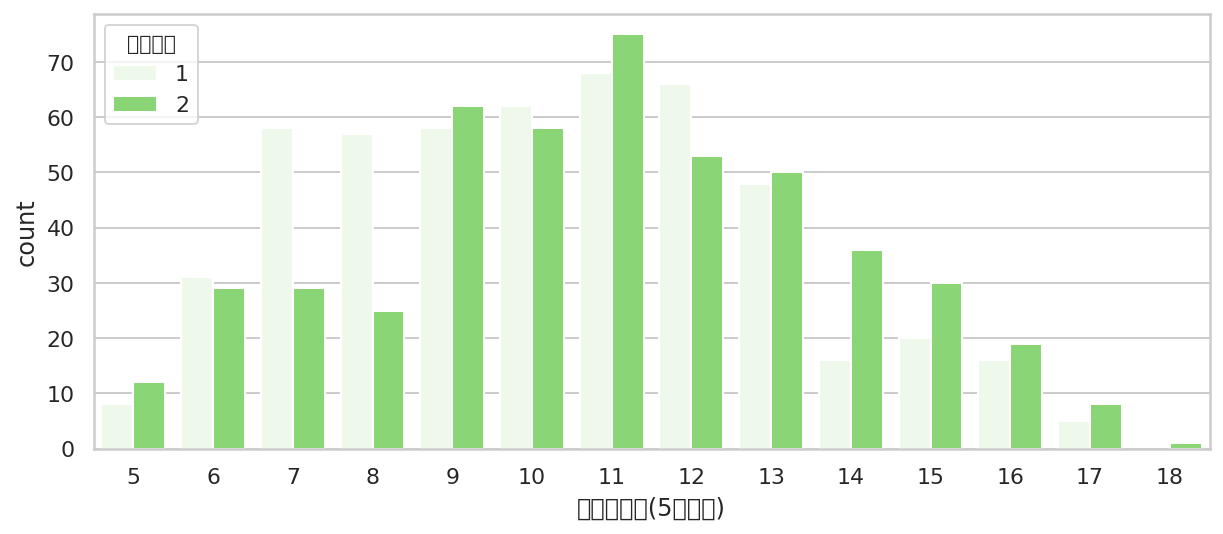

In [15]:
#RGB 칼라 코드를 이용해서 그래프를 그릴 수도 있습니다. hue 옵션의 경우 밝기와 채도 조절을 통해 자동으로 세팅이 됩니다.
plt.figure(figsize=[10,4])
sns.countplot(x='연령대코드(5세단위)', hue="성별코드", data=data, color='#80e666')

### color_palette 사용하기

색을 팔레트를 이용하여 다채롭게 표현하고 싶은 경우에는 seaborn의 팔레트를 이용합니다.

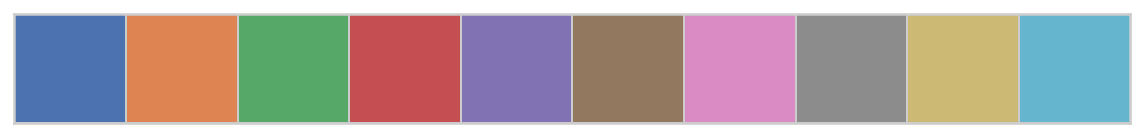

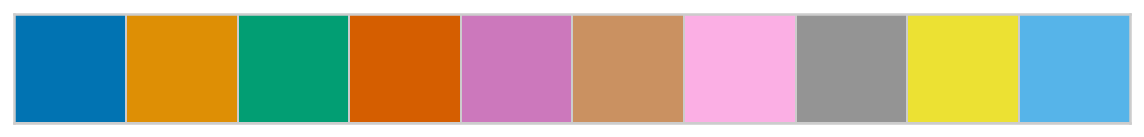

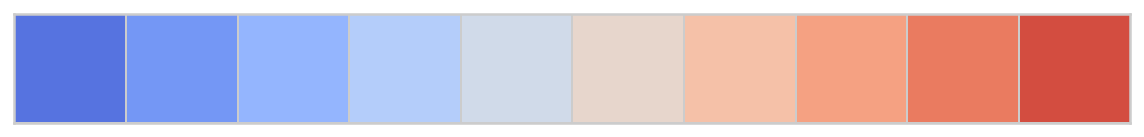

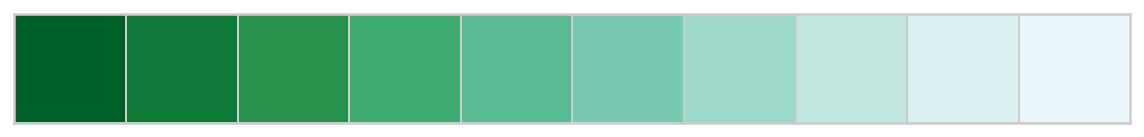

In [16]:
sns.palplot(sns.color_palette("deep", 10))
sns.palplot(sns.color_palette("colorblind", 10))
sns.palplot(sns.color_palette("coolwarm", 10))
sns.palplot(sns.color_palette("BuGn_r", 10))

위 색 이외에도 내장된 팔레트가 많습니다.
팔레트의 리스트는 다음과 같습니다.

Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

상세한 사용 방법은 [다음의 링크](https://seaborn.pydata.org/tutorial/color_palettes.html)에서 확인해주세요.

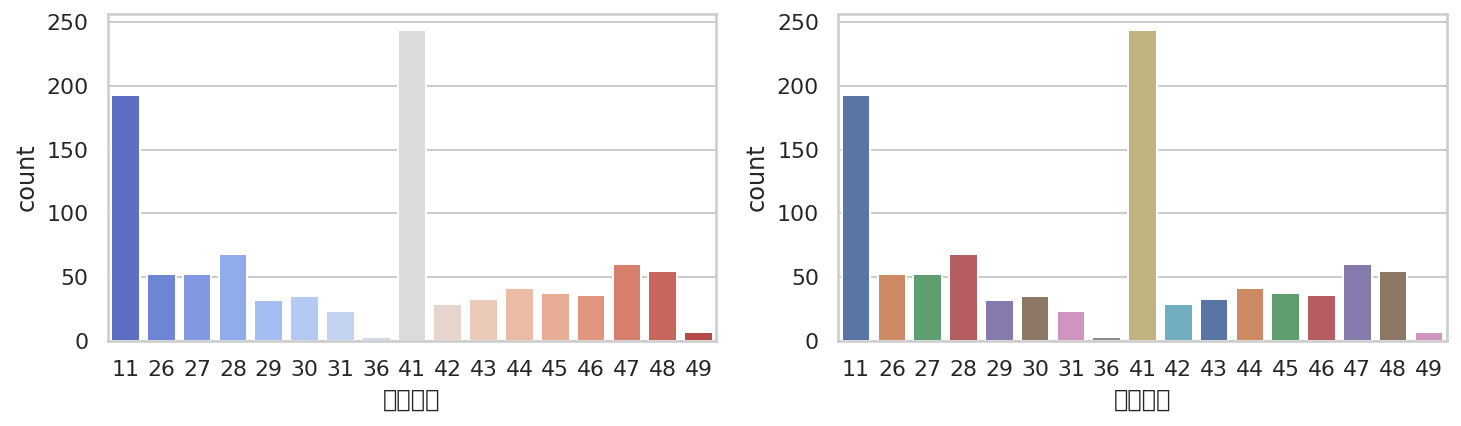

In [17]:
#palette 옵션을 이용해 그래프에 팔레트 색상을 넣어줄 수 있습니다.
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)
fig.set_size_inches([12,3])

sns.countplot(x='시도코드', data=data, palette=sns.color_palette("coolwarm", 17), ax=ax1)
sns.countplot(x='시도코드', data=data, palette=sns.color_palette("deep"), ax=ax2)


light_palette는 지정한 색을 희석시키는 역할을 합니다. 단계를 지정할 수도 있고, 그 방향을 정할 수도 있습니다. 

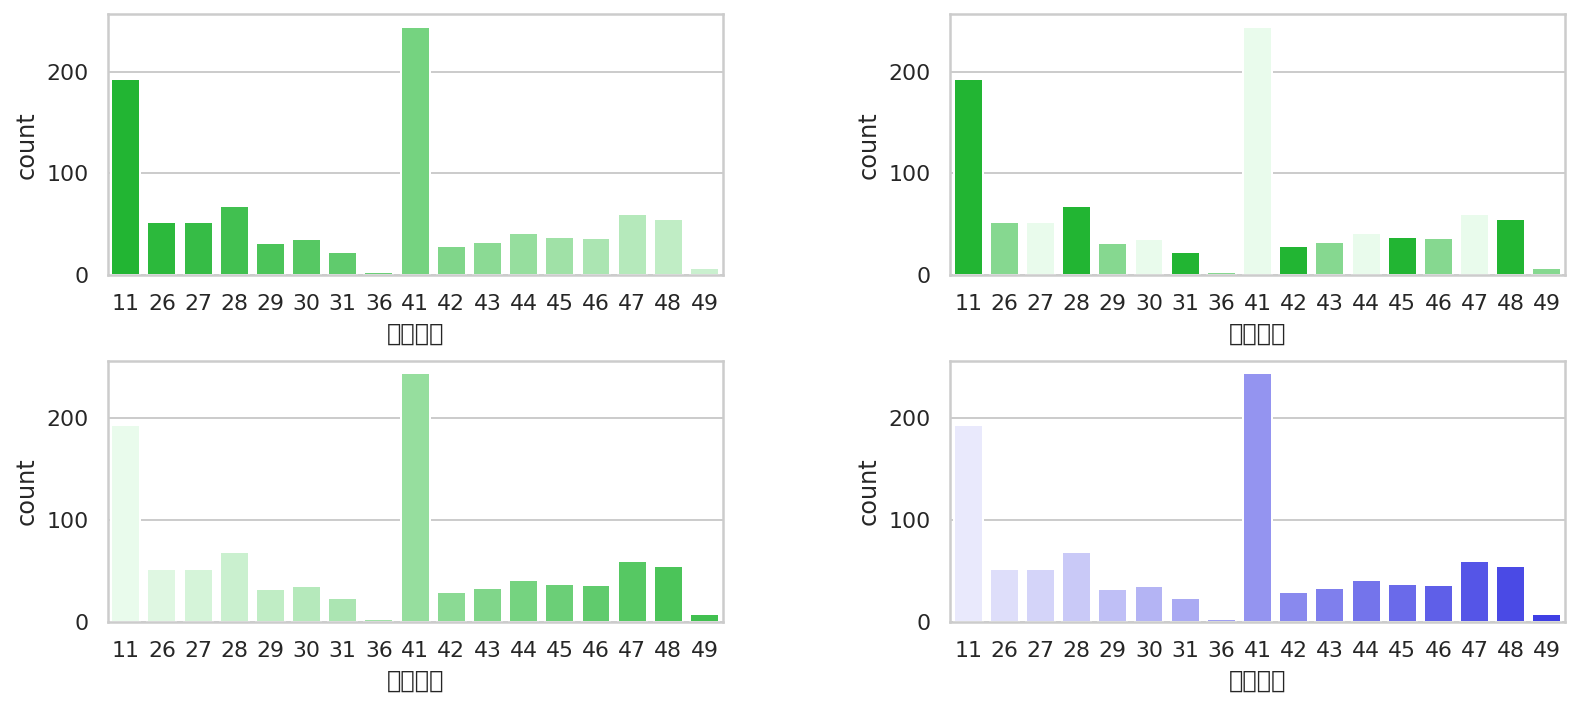

In [18]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
plt.tight_layout() #글씨가 겹치는 것을 막아주는 코드입니다.
fig.set_size_inches([12,5])

sns.countplot(x='시도코드', data=data, palette=sns.light_palette("#09CE20",n_colors=20, reverse=True), ax=ax1)
sns.countplot(x='시도코드', data=data, palette=sns.light_palette("#09CE20",n_colors=3, reverse=True), ax=ax2) #3개의 색상이 반복됩니다.
sns.countplot(x='시도코드', data=data, palette=sns.light_palette("#09CE20",n_colors=20, reverse=False), ax=ax3)
sns.countplot(x='시도코드', data=data, palette=sns.light_palette("blue",n_colors=20, reverse=False), ax=ax4)

countplot의 경우 그래프를 밑으로 길게 늘이고 싶은 경우 x 옵션이 아닌 y옵션을 주면 됩니다.

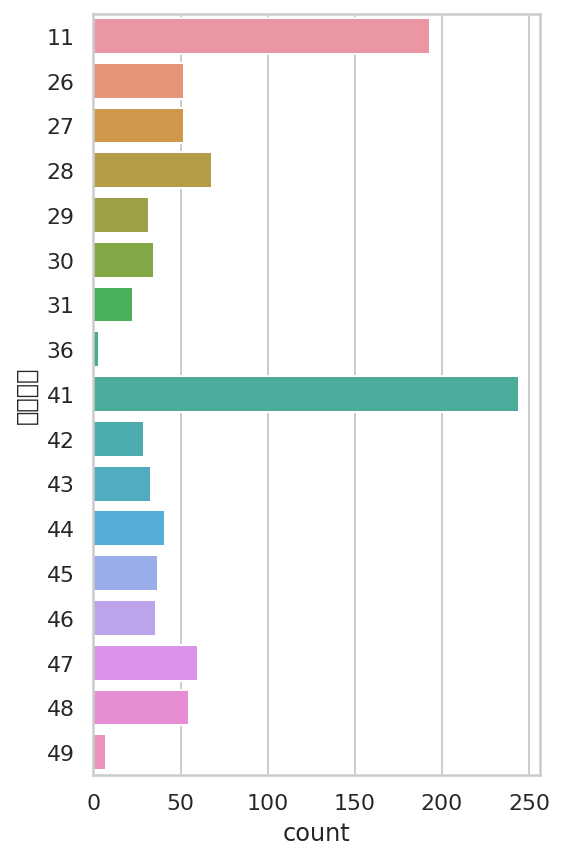

In [19]:
plt.figure(figsize=[4, 7])

sns.countplot(y="시도코드", data=data)
#그린 그래프를 저장하고 싶을 때는 plt.savefig()를 이용합니다.
plt.savefig('테스트.png')

### distplot

distplot은 scipy의 stats 모듈을 이용하여 데이터의 분포를 확률분포(pdf, probability distribution function)로 만들어주고, 동시에 히스토그램을 그릴 수 있는 plot입니다. 데이터의 분포를 가장 정확하게 볼 수 있는 plot이지만, 다른 plot들과 옵션이 통일되지 않아 사용법을 따로 익혀야 합니다.

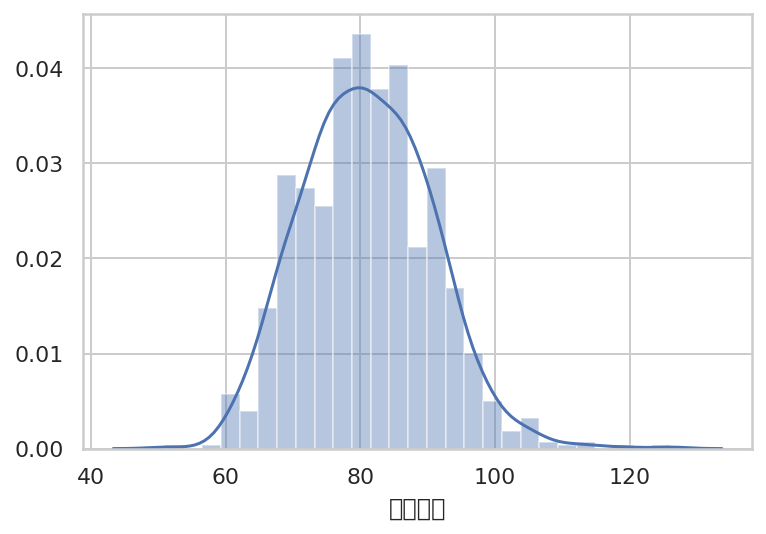

In [20]:
# 다른 plot과는 다르게, pandas의 Series 나 numpy의 array를 넣어주어야 합니다. 데이터프레임 전체를 넣으면 오류가 납니다.
sns.distplot(data["허리둘레"])

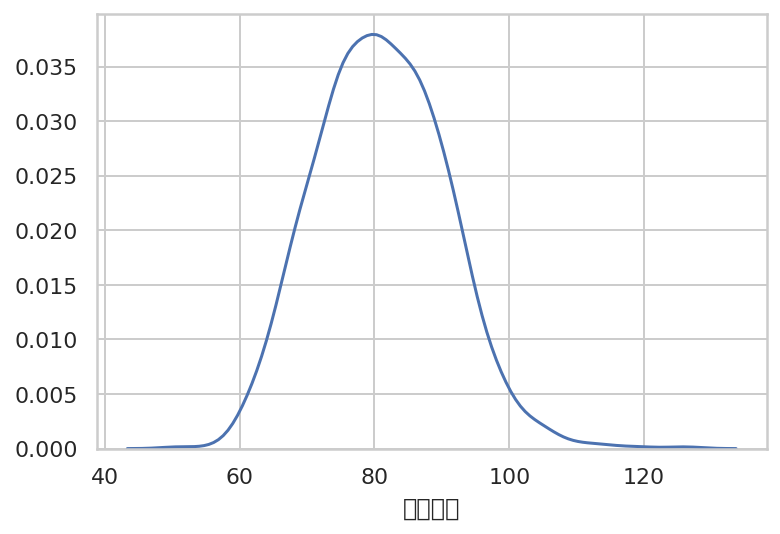

In [21]:
#histogram을 생략하기 위해서는 hist 옵션을 줄 수 있습니다.
sns.distplot(data["허리둘레"], hist=False)

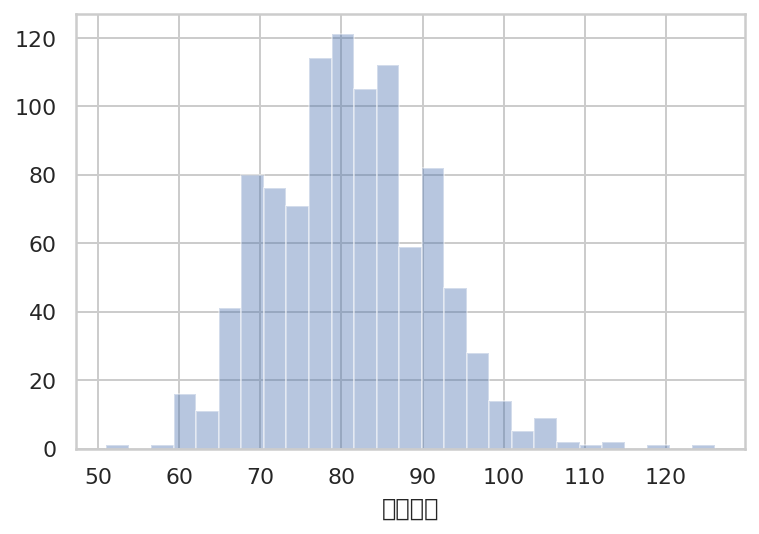

In [22]:
# 확률분포를 생략하기 위해서는 kde 옵션을 줄 수 있습니다.
sns.distplot(data["허리둘레"], kde=False)

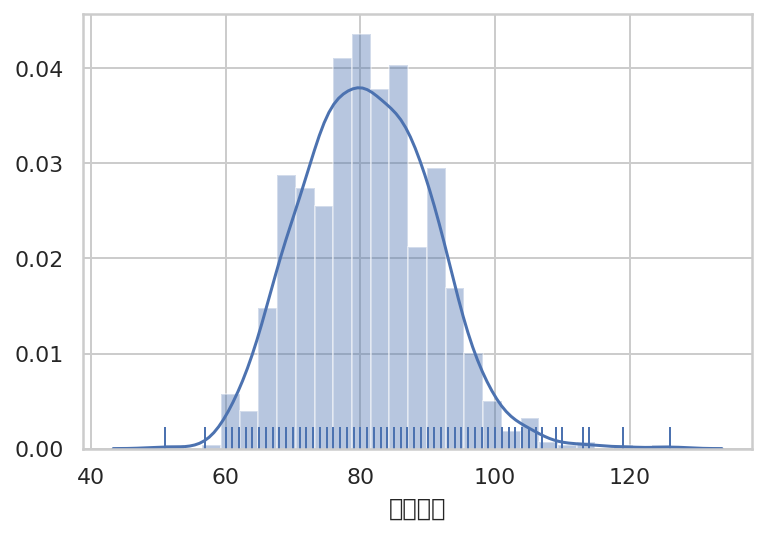

In [23]:
# rug 옵션을 통해 데이터의 정확한 위치를 파악할 수 있습니다.
sns.distplot(data["허리둘레"], rug=True)

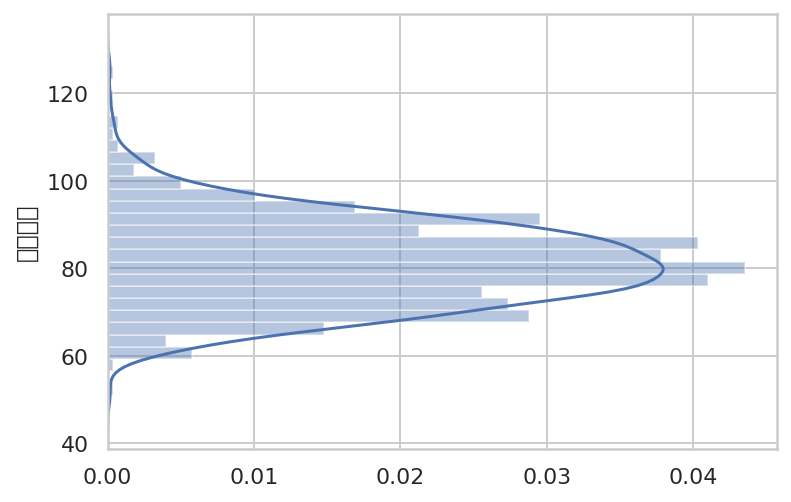

In [24]:
#다른 plot은 orient 옵션을 사용하지만, 방향을 바꿀 때 distplot은 vertical 옵션을 활용합니다.
sns.distplot(data["허리둘레"], vertical=True)

여러가지의 distplot을 하나의 figure에 그리고 싶은 경우에는 다음과 같이 하나의 코드블럭 안에 여러번의 distplot을 그려주시면 됩니다.

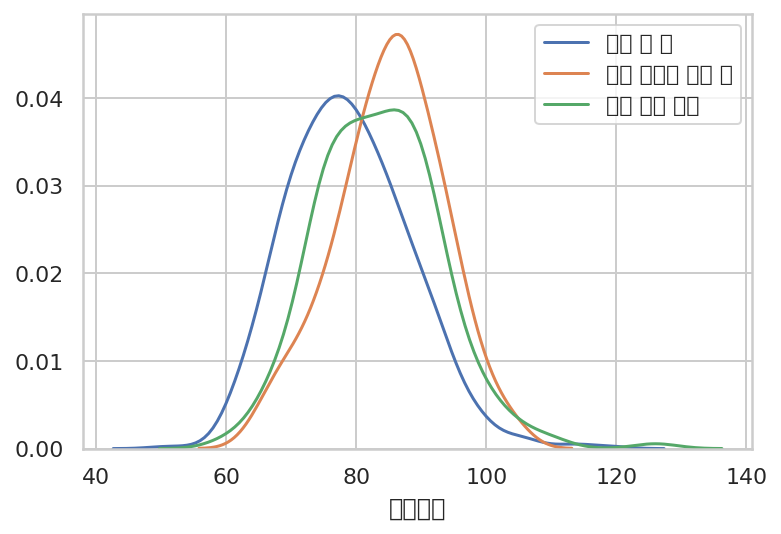

In [25]:
one = data[data["흡연상태"] == 1]
two = data[data["흡연상태"] == 2]
three = data[data["흡연상태"] == 3]

sns.distplot(one["허리둘레"], label="흡연 안 함", hist=False)
sns.distplot(two["허리둘레"], label="흡연 했지만 그만 둠", hist=False)
sns.distplot(three["허리둘레"], label="흡연 하고 있음", hist=False)

plt.legend()

### Barplot

Barplot을 그리는 경우 정체불명의 검은 선이 나오는 것을 확인할 수 있습니다. 이는 데이터 (y값)에 대한 신뢰구간을 의미합니다. 고등학교 때는 정규분포를 가정하여 데이터의 신뢰 구간을 구하지만 seaborn은 **Bootstrap**을 이용하여 신뢰구간 (confidence interval)을 구합니다. 자세한 내용은 아래 링크로 대체합니다.

[Bootstrap percentile confidential interval 이론 설명](https://garstats.wordpress.com/2016/05/27/the-percentile-bootstrap/)

간략히 요약을 하자면 데이터를 반복추출하여 중앙값들을 모은 뒤, 중앙값들의 분포를 바탕으로 중앙값의 신뢰구간 (기본 옵션은 95% 신뢰구간)을 구하는 것입니다.

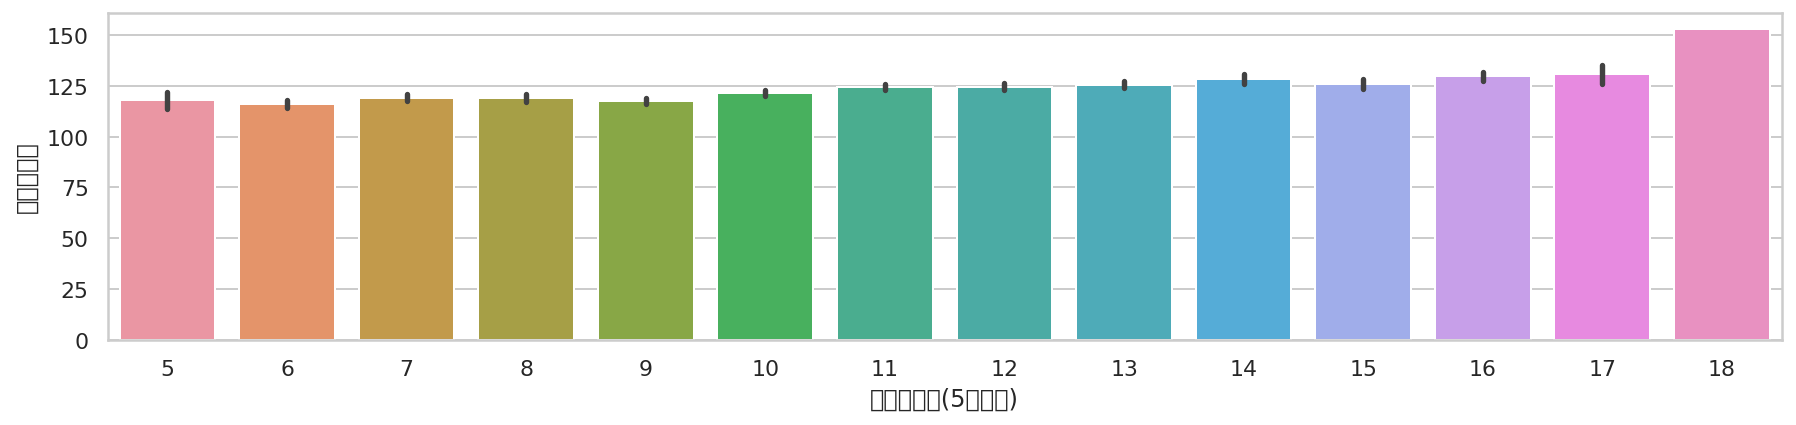

In [26]:
# 각 연령대별로 수축기혈압의 평균에 대한 신뢰구간을 확인할 수 있습니다. 신뢰구간 80%
plt.figure(figsize=[15,3])
sns.barplot(x='연령대코드(5세단위)', y='수축기혈압',ci=80, data=data)

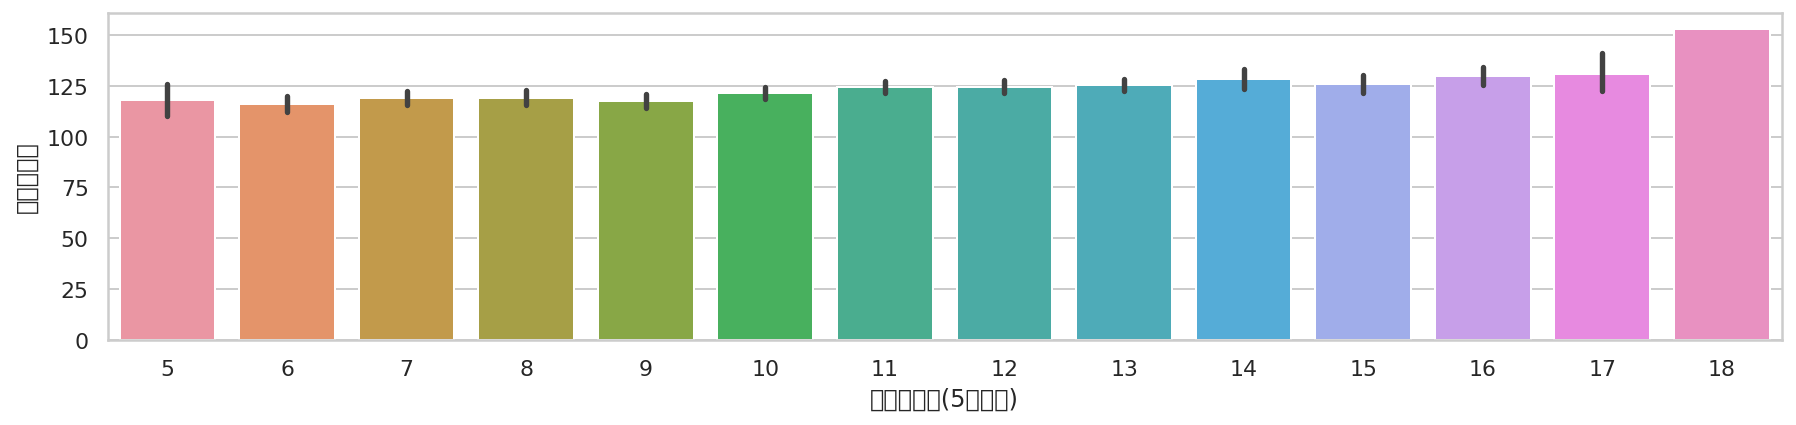

In [27]:
# 신뢰 구간을 늘릴 경우 막대기가 길어지는 것을 파악할 수 있다.
plt.figure(figsize=[15,3])
sns.barplot(x='연령대코드(5세단위)', y='수축기혈압',ci=99, data=data)

위 신뢰구간의 경우 분포가 아닌 순전히 중앙값만의 신뢰구간을 구하는 것이기 때문에 참고용으로만 보시면 됩니다. 만약 연령대별 혈압의 분포를 보고 싶은 경우, 표준편차를 사용하도록 'sd'옵션을 넣으면 됩니다.

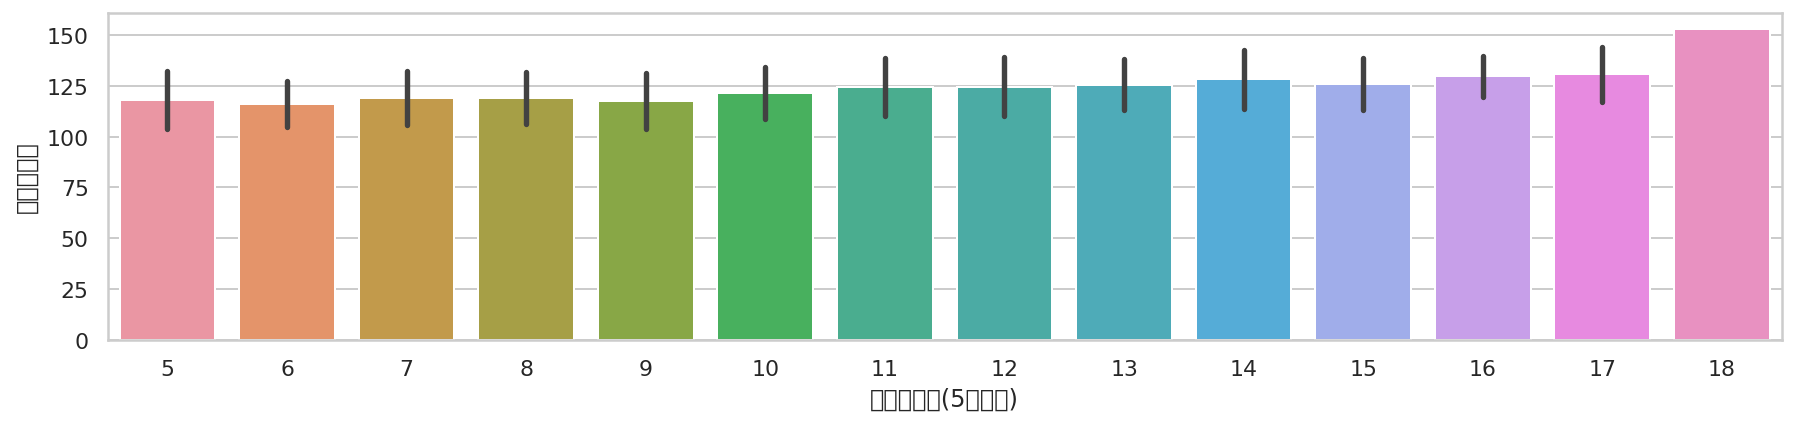

In [28]:
plt.figure(figsize=[15,3])

# ci를 standard deviation으로 변경
sns.barplot(x='연령대코드(5세단위)', y='수축기혈압', data=data, ci='sd')

**평균(mean)이 아닌 다른 값 띄우기**

barplot은 각 x값에 해당하는 y값들을 array **(vector)**로 만든 뒤, 이를 평균**(scalar)**을 내어 그래프에 표시합니다. 평균 이외에 다른 값을 표시하고 싶은 경우, function을 정의해 estimator 옵션에 넣을 수 있습니다.

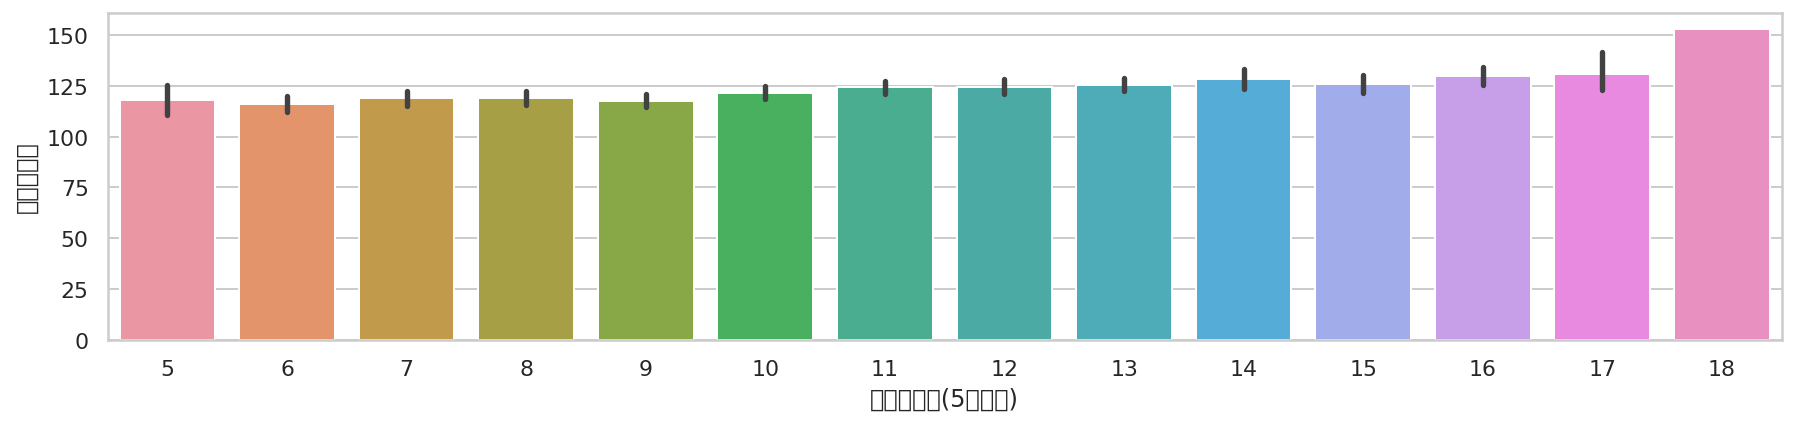

In [29]:
plt.figure(figsize=[15,3])

# mean을 사용하는 경우 기존과 같은 그래프가 나옵니다.
sns.barplot(x='연령대코드(5세단위)', y='수축기혈압', data=data, ci=99, estimator=np.mean)

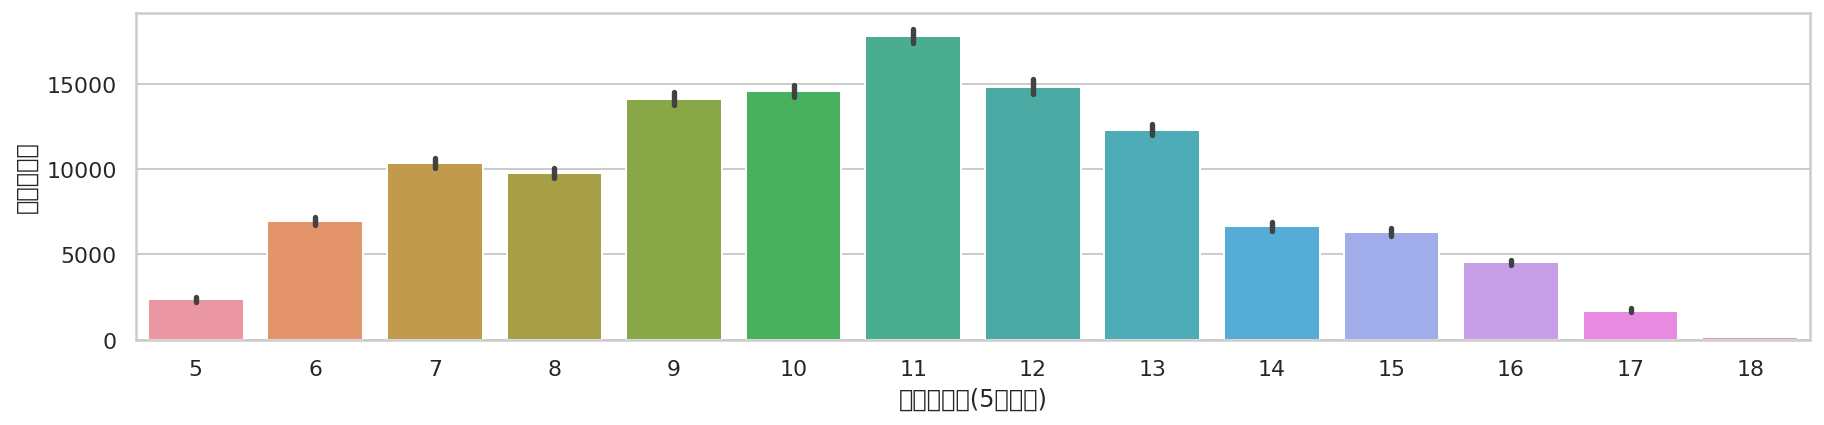

In [30]:
plt.figure(figsize=[15,3])

# sum으로 변환해 카테고리별 누적합을 구할 수도 있습니다.
sns.barplot(x='연령대코드(5세단위)', y='수축기혈압', data=data, ci=99, estimator=np.sum)

numpy array를 받아 scalar (특정 값)으로 변환하는 함수를 직접 정의할 수도 있습니다.

In [31]:
def return_range(array):
    return array.argmax()-array.argmin()

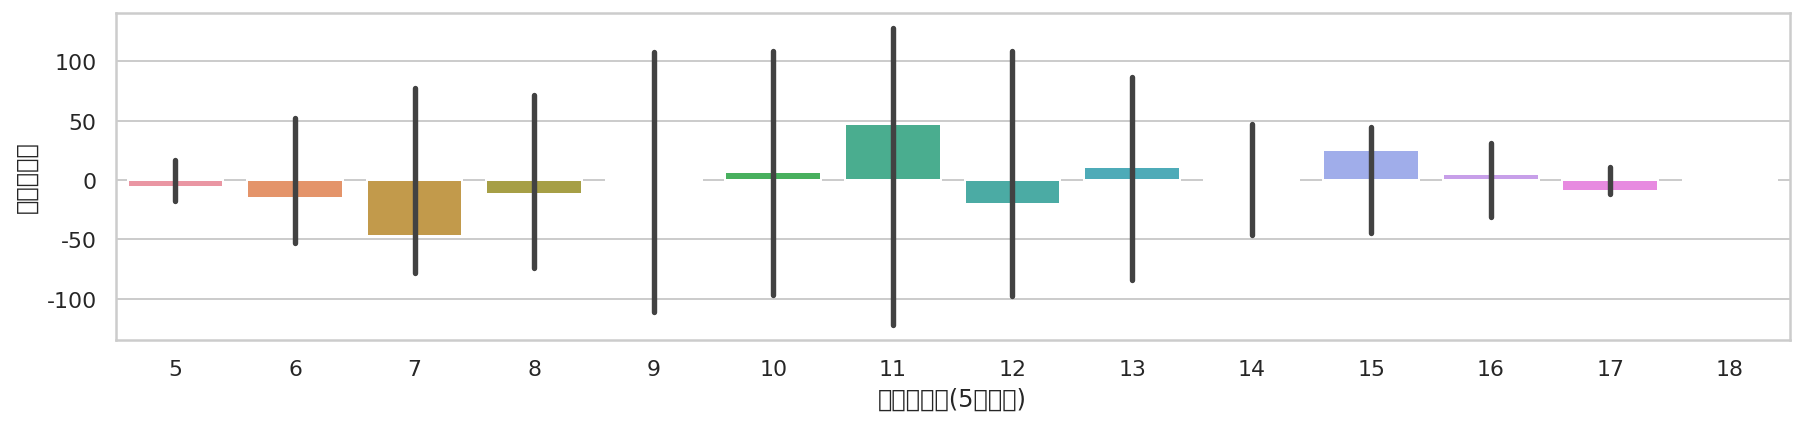

In [32]:
plt.figure(figsize=[15,3])

# sum으로 변환해 카테고리별 누적합을 구할 수도 있습니다.
sns.barplot(x='연령대코드(5세단위)', y='수축기혈압', data=data, ci=99, estimator=return_range)

barplot은 orient 옵션을 통해 그래프의 방향을 수정할 수 있습니다. 'v'는 vertical, 'h'는 horizon의 약자입니다.

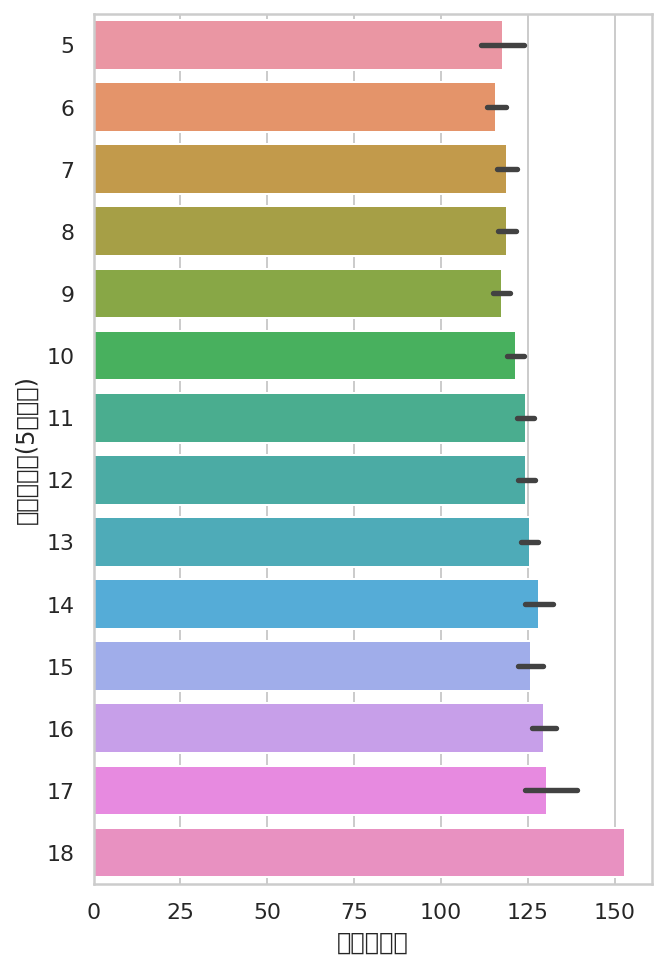

In [33]:
plt.figure(figsize=[5,8])

sns.barplot(x='수축기혈압', y='연령대코드(5세단위)', data=data, orient='h')

데이터 사전 처리를 통해 평균으로부터 얼마나 떨어져 있는지를 직관적으로 나타낼 수도 있습니다.

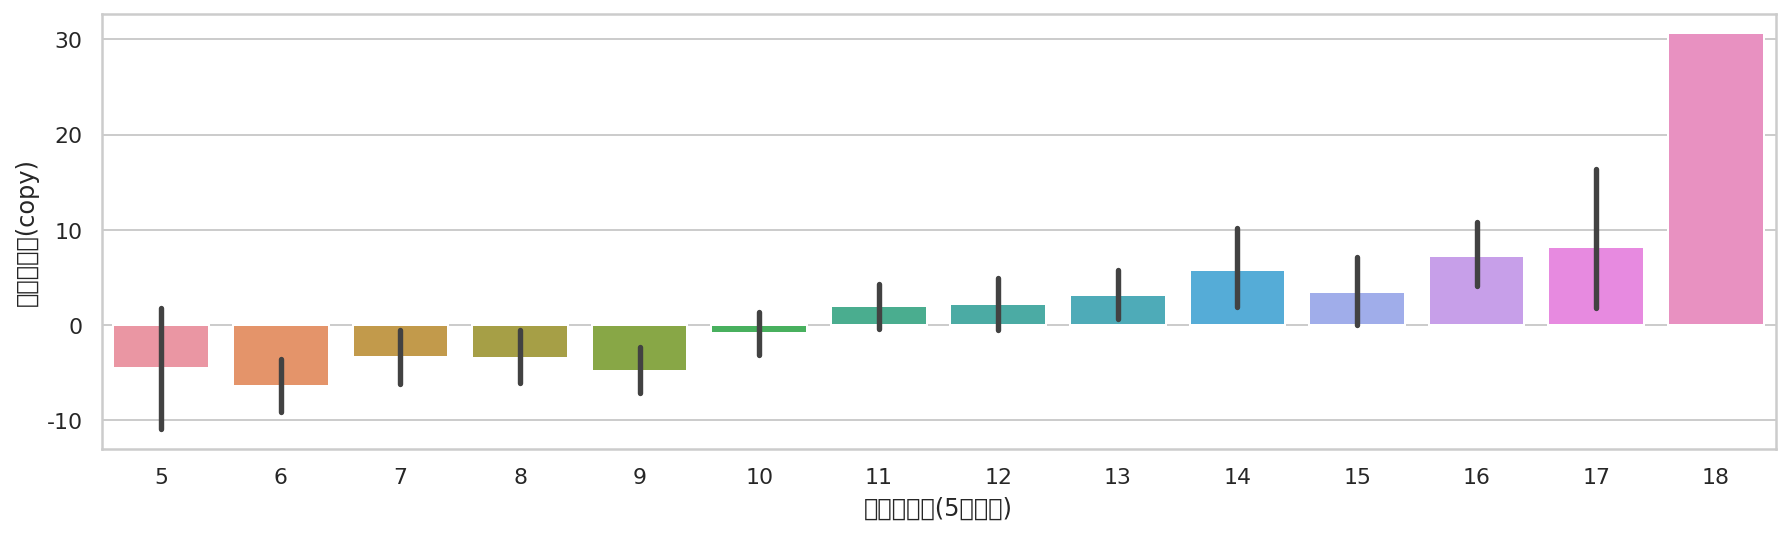

In [34]:
data["수축기혈압(copy)"] = data["수축기혈압"]
data["수축기혈압(copy)"] = data["수축기혈압"] - data["수축기혈압"].mean()

plt.figure(figsize=[15,4])

sns.barplot(x='연령대코드(5세단위)', y='수축기혈압(copy)', data=data)

order 옵션을 이용하여 보고 싶은 값만 선택하거나, x값의 순서를 조정할 수 있습니다.

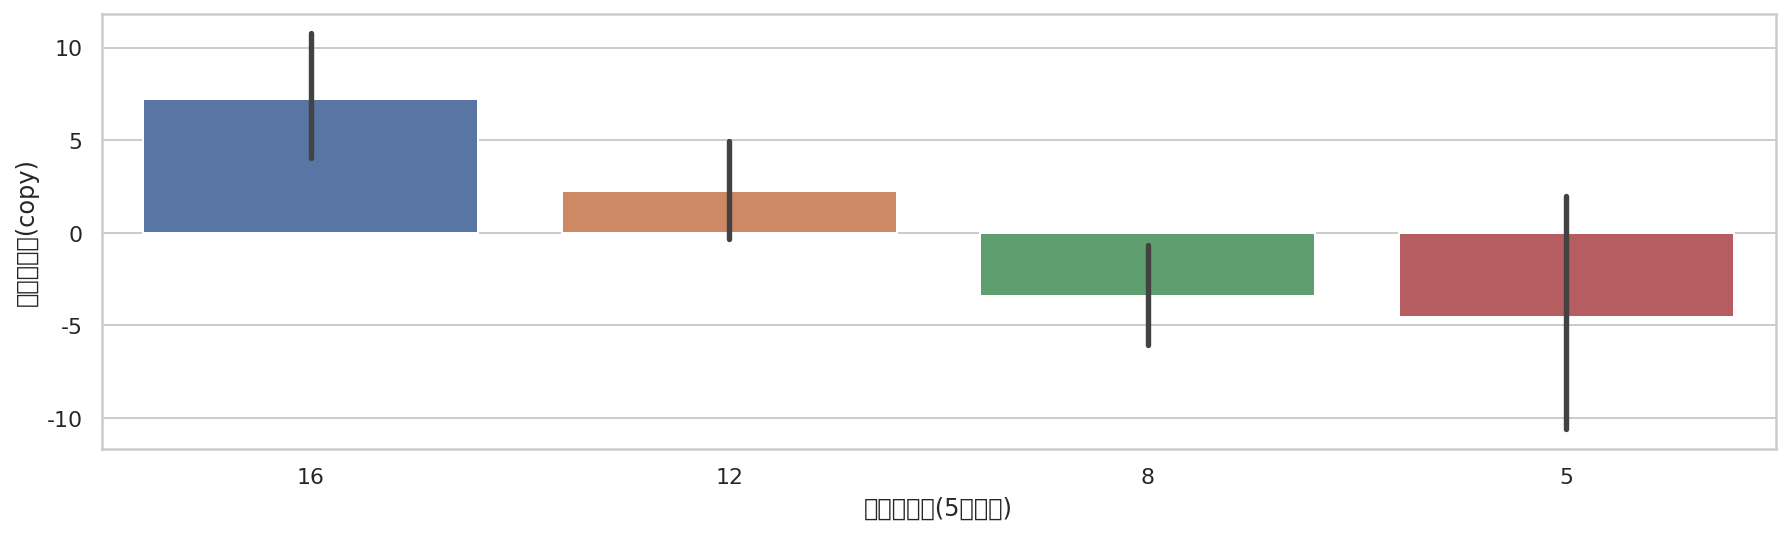

In [35]:
plt.figure(figsize=[15,4])

# ci를 standard deviation으로 변경
sns.barplot(x='연령대코드(5세단위)', y='수축기혈압(copy)', order=[16, 12, 8, 5], data=data)

### pointplot

pointplot은 barplot과 거의 동일한 기능을 하나, 막대기 대신 각 평균값들을 선으로 잇는 특징을 가집니다. 이는 x값들 사이에 상관(correlation)이 있을 경우 적합한 시각화 방식입니다. 예를 들면, 시간의 흐름 또는 시험 등급 등이 들어갈 수 있습니다. 

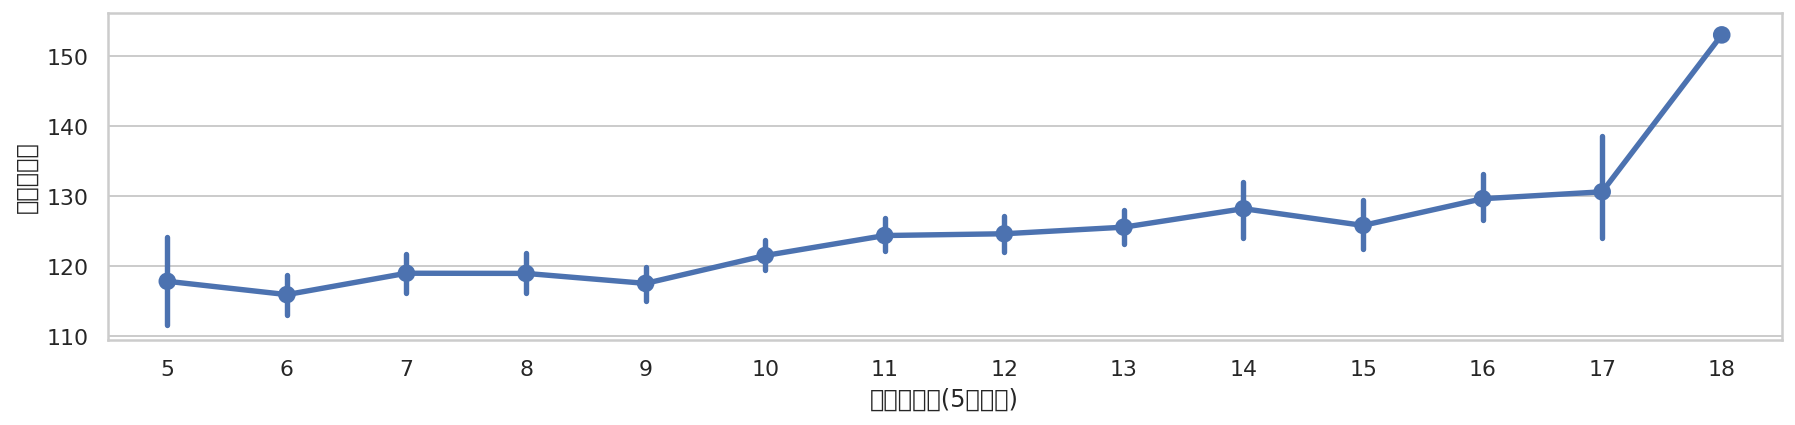

In [36]:
plt.figure(figsize=[15,3])

sns.pointplot(x='연령대코드(5세단위)', y='수축기혈압', data=data)

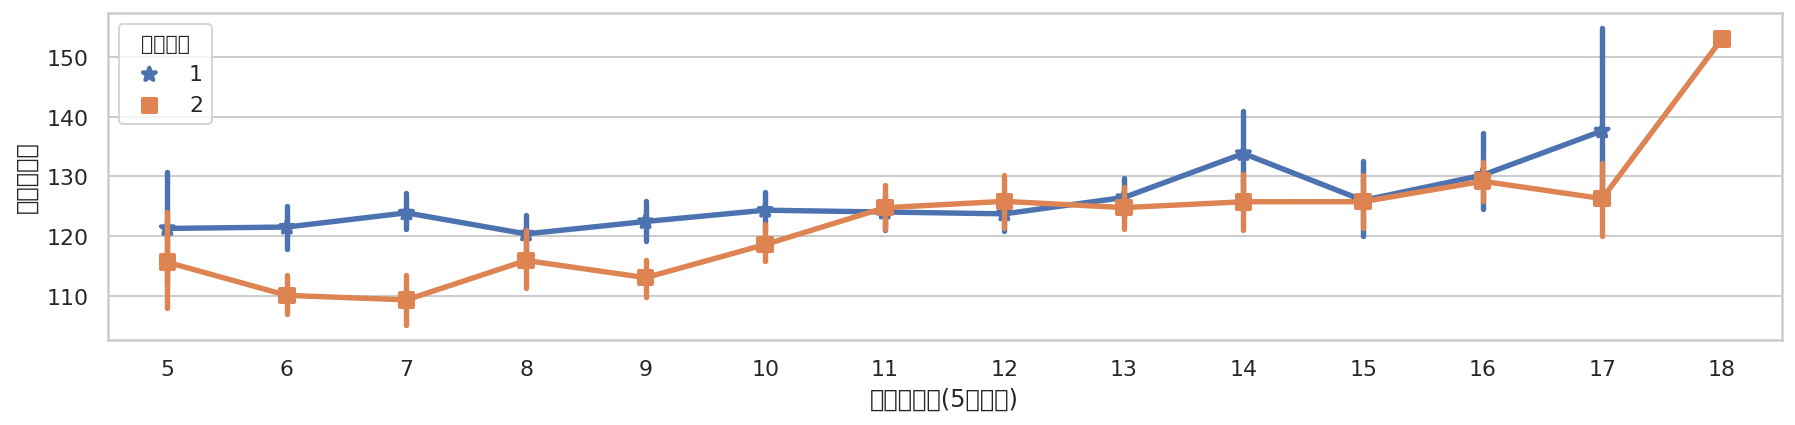

In [37]:
plt.figure(figsize=[15,3])

sns.pointplot(x='연령대코드(5세단위)', y='수축기혈압', markers=['*','s'], hue='성별코드',  data=data)

linestyle을 바꾸는 것도 가능합니다. 사전 지정된 linestyle은 아래의 링크를 참조해주세요.

[Line Style Reference](https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html)

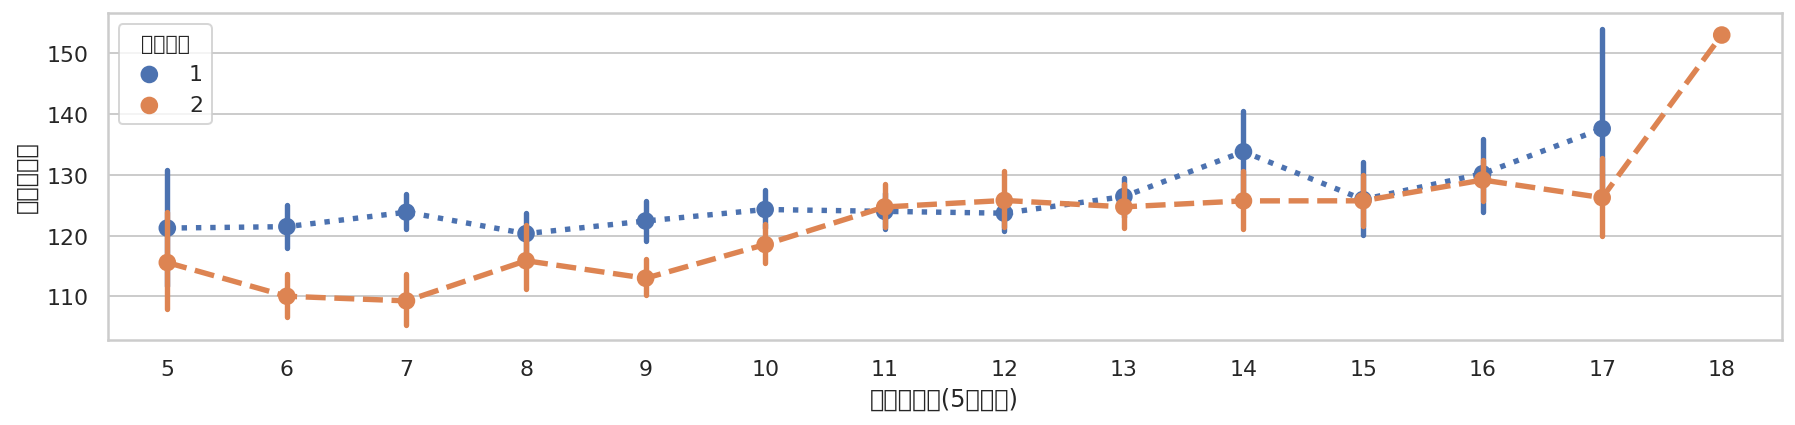

In [38]:
plt.figure(figsize=[15,3])

# ci를 standard deviation으로 변경
sns.pointplot(x='연령대코드(5세단위)', y='수축기혈압',hue='성별코드', linestyles=[':', '--'], data=data)

비슷하게 marker 옵션을 바꾸는 것도 가능합니다.

[Marker Reference](https://matplotlib.org/api/markers_api.html)

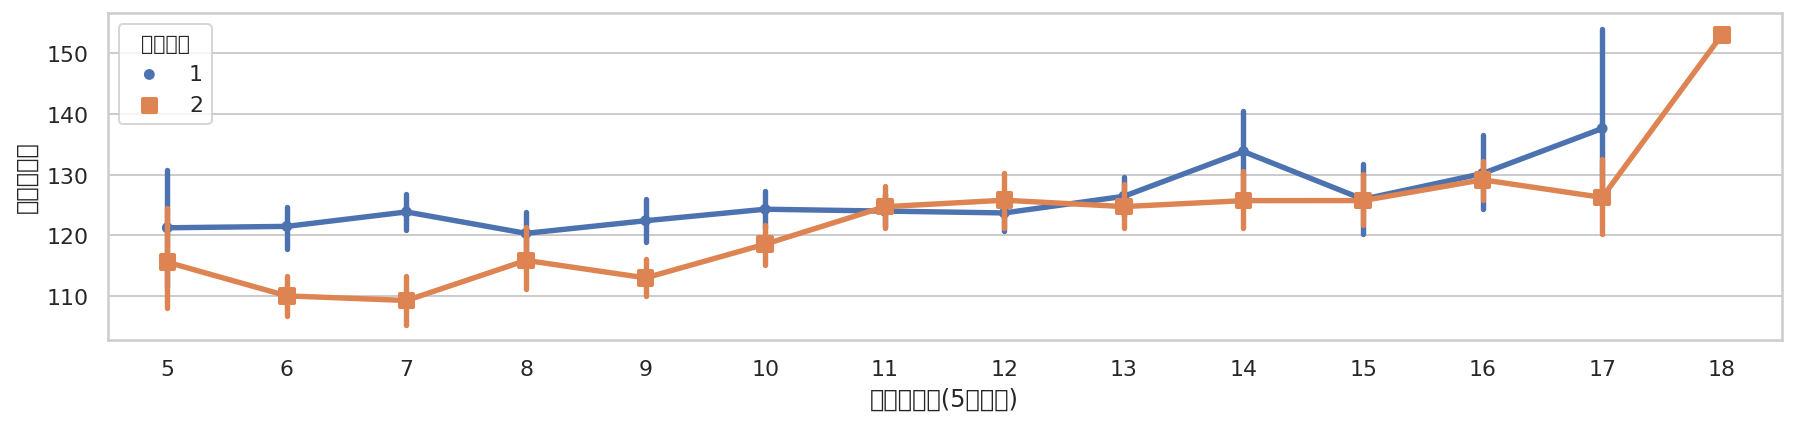

In [39]:
plt.figure(figsize=[15,3])

sns.pointplot(x='연령대코드(5세단위)', y='수축기혈압',hue='성별코드', markers=['.', ','], data=data)

### boxplot

barplot은 평균을 직관적으로 보여주지만 각 클래스별 데이터의 분포를 정확히 보여주지 못합니다. boxplot이나 violinplot은 데이터의 분포를 조금 더 세밀하게 볼 수 있는 plot입니다. 하지만, 동시에 직관적으로 이해가 되지 않는다는 단점도 있습니다.

우선, boxplot을 이해하기 위해서는 분위수라는 개념을 알아야 합니다.

#### 분위수 (Quantile)

중앙값이 데이터를 2개의 동일한 사이즈로 나누었을 때, 그 경계값을 의미한다면, 4분위수는 데이터를 4개의 동일한 사이즈로 나누었을 때 그 경계값들을 의미합니다.

자료의 1/4 (25%) 지점을 1분위수, 2/4 (50%) 지점을 2분위수 (=중앙값), 3/4 (75%) 지점을 3분위수라고 합니다. 이를 그림으로 나타내면 아래와 같습니다.

![image](https://i.imgur.com/tssRkgA.jpg)

이를 바탕으로 식전 공복혈당의 1,2,3분위수를 구하면 다음과 같습니다.

In [40]:
# pandas.Series에서 바로 quantile 메소드를 이용해 분위수를 구할 수 있습니다.
print(f"1분위수는 {data['식전혈당(공복혈당)'].quantile(q=0.25)}입니다.")
print(f"2분위수는 {data['식전혈당(공복혈당)'].quantile(q=0.50)}입니다.")
print(f"3분위수는 {data['식전혈당(공복혈당)'].quantile(q=0.75)}입니다.")

1분위수는 88.0입니다.
2분위수는 96.0입니다.
3분위수는 105.0입니다.


Boxplot의 사각형의 3가지 선이 각각 1,2,3분위수를 나타내고 막대기의 양끝 선은 최댓값, 최솟값을 의미합니다. 식전혈당 상자 그림을 다시 그려보면 아래와 같습니다.

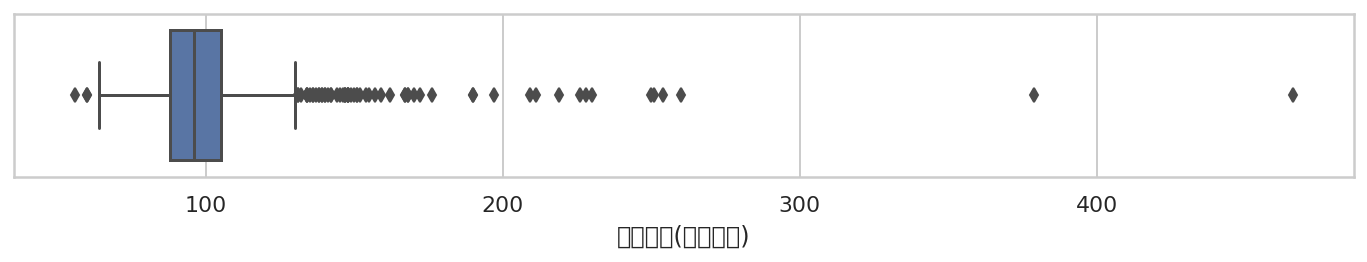

In [41]:
#orient 옵션을 이용해 방향을 바꾸어 horizon하게 상자수염을 그립니다.
plt.figure(figsize=[12,1.5])
sns.boxplot(data['식전혈당(공복혈당)'], orient='h')

분명히 막대기의 왼쪽 끝과 오른쪽 끝이 최댓값과 최솟값을 의미한다고 했는데, 그 밖에 데이터가 점으로 존재하는 이유가 무엇일까요? 아래 그림을 참조하면 쉽게 이해할 수 있습니다.

<img src="https://i.imgur.com/CnFsXL9.png" width=450>

알고리즘이나 분석가마다 기준이 다르기는 하지만, 일반적으로 *IQR = 3분위수 - 1분위수* 로 정의한 뒤 

*Upper Fence = 3분위수 + 1.5 * IQR*

*Lower Fence = 1분위수 - 1.5 * IQR*

를 만들고, 이 범위를 벗어나는 데이터는 **Outlier (이상치)**라고 정의합니다. seaborn에서는 whis라는 옵션을 이용해 이 범위를 조절할 수 있습니다.

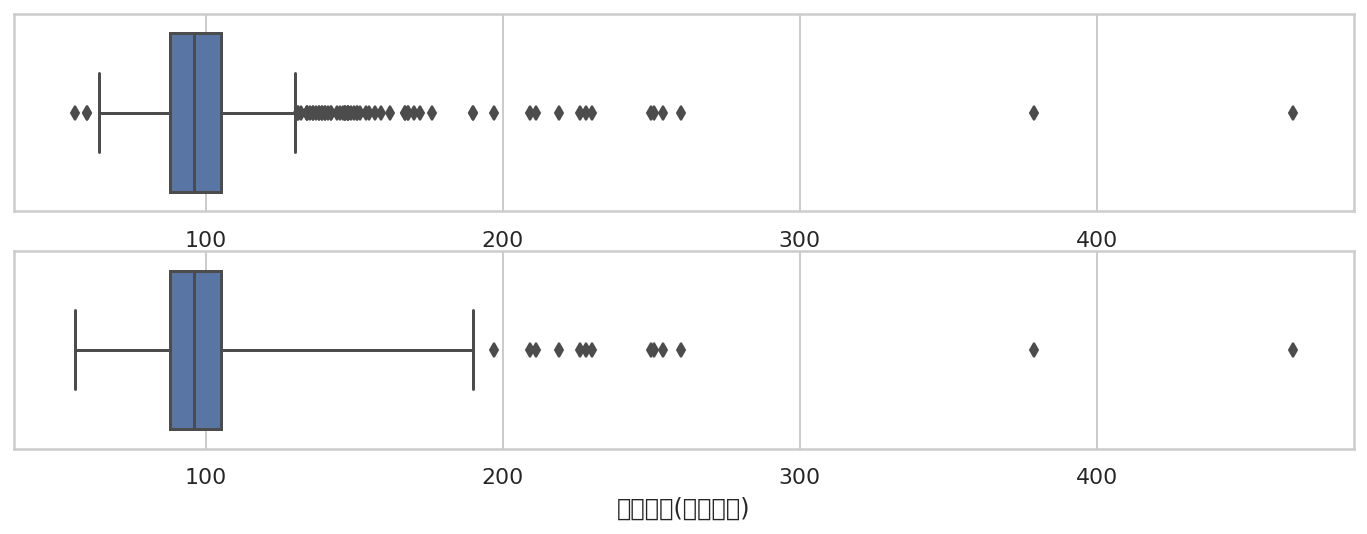

In [42]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches([12,4])

#whis 범위를 조절해 outlier처리할 범위를 조절
sns.boxplot(data['식전혈당(공복혈당)'], orient='h', whis=1.5, ax=ax1)
sns.boxplot(data['식전혈당(공복혈당)'], orient='h', whis=5, ax=ax2)

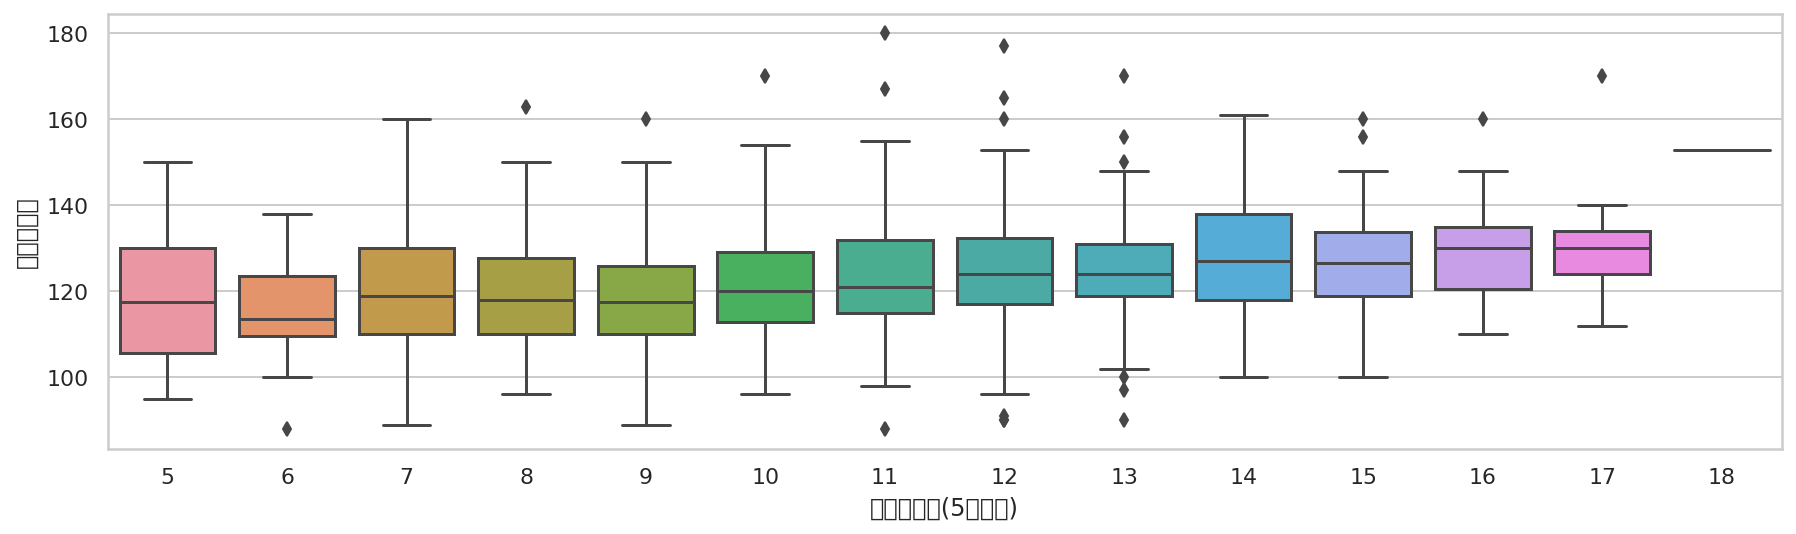

In [43]:
plt.figure(figsize=[15,4])

sns.boxplot(x='연령대코드(5세단위)', y='수축기혈압', data=data)

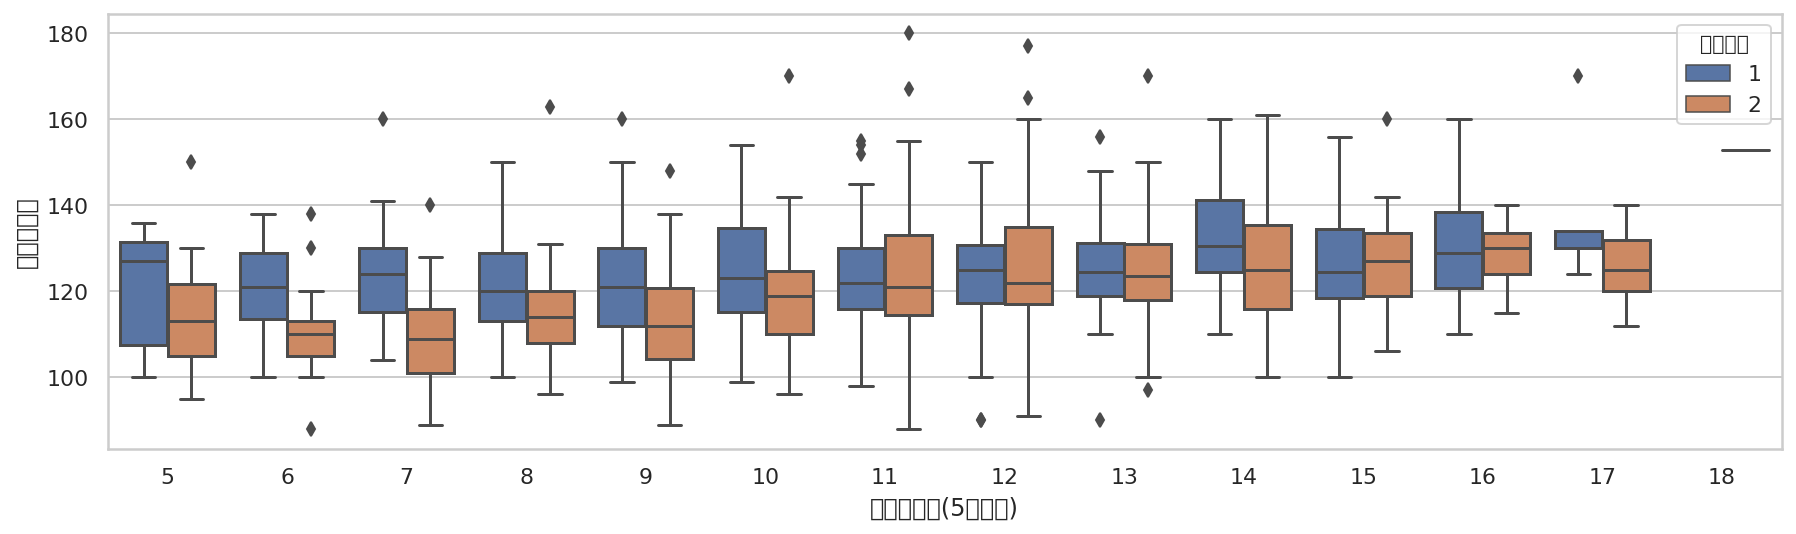

In [44]:
plt.figure(figsize=[15,4])

sns.boxplot(x='연령대코드(5세단위)', y='수축기혈압',hue='성별코드', data=data)

### violinplot

violinplot은 boxplot보다 조금 더 데이터의 분포를 확실하게 볼 수 있는 plot입니다. distplot을 카테고리별로 그린 버전이라고 생각하시면 좋습니다.

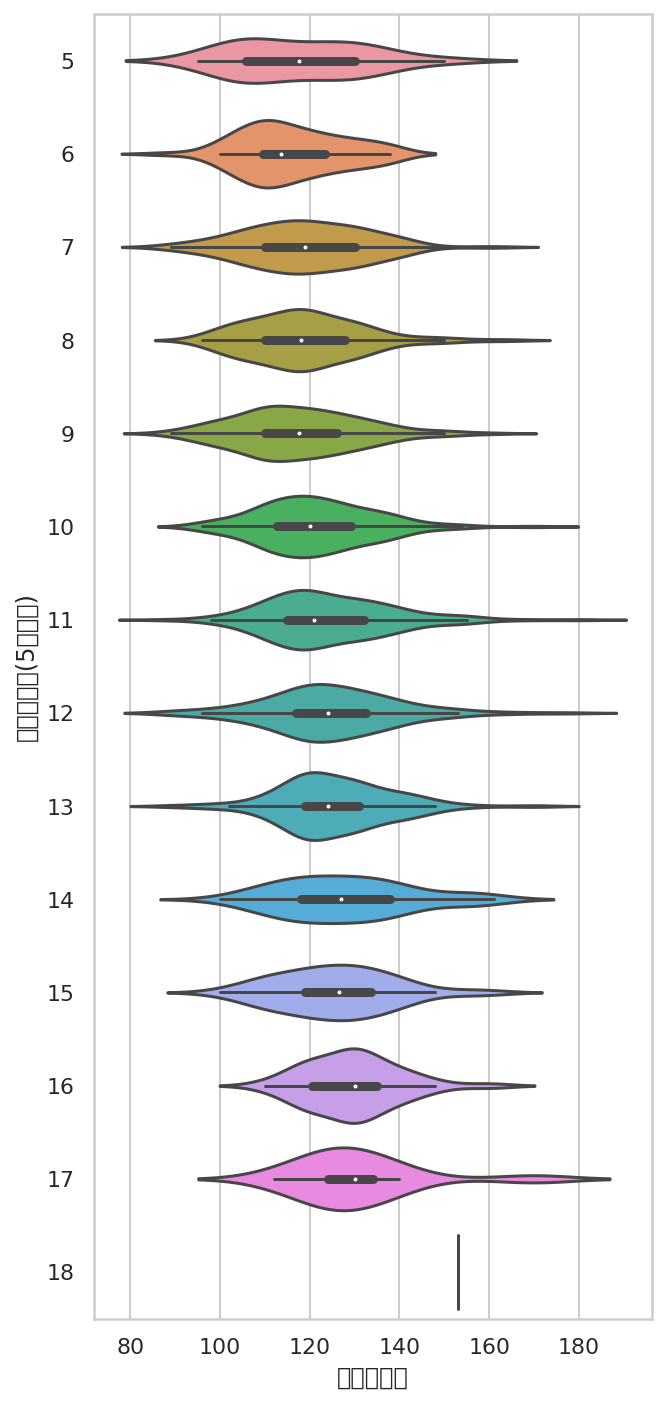

In [45]:
plt.figure(figsize=[5,12])

sns.violinplot(y='연령대코드(5세단위)', x='수축기혈압', data=data, inner='box', orient='h')

마찬가지로 hue옵션을 사용할 수 있습니다.

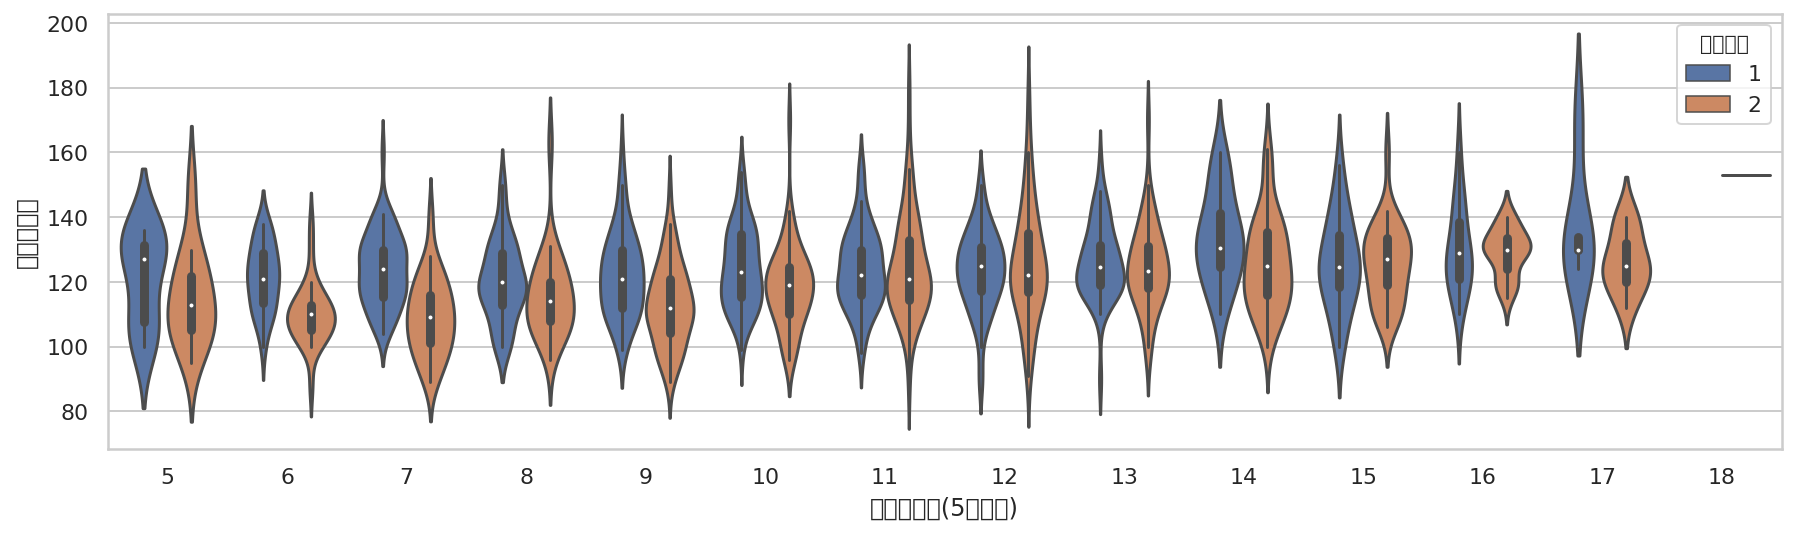

In [46]:
plt.figure(figsize=[15,4])

sns.violinplot(x='연령대코드(5세단위)', y='수축기혈압', data=data, hue="성별코드", inner='box')

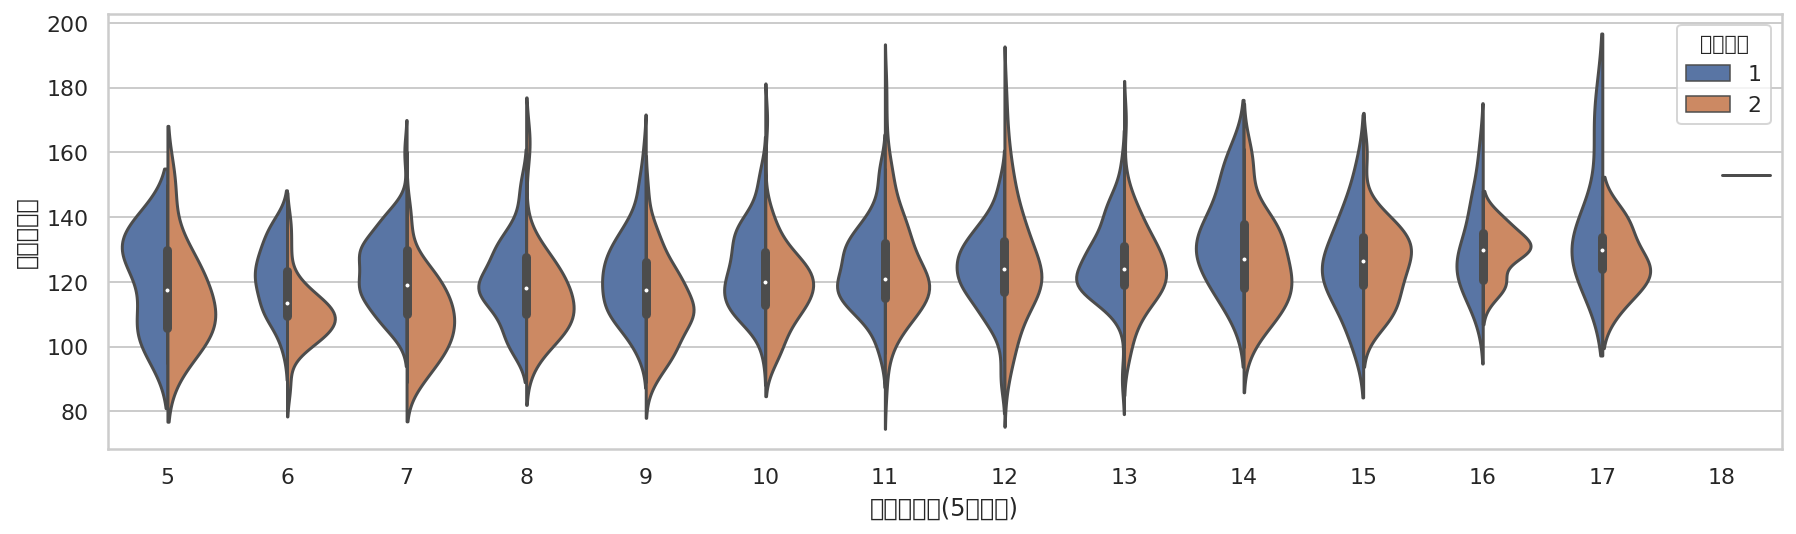

In [47]:
plt.figure(figsize=[15,4])

#split 옵션을 통해 성별코드 별로 violinplot을 각각 그리는 것이 아닌, 좌우로 쪼개 하나로 그릴 수 있습니다.
sns.violinplot(x='연령대코드(5세단위)', y='수축기혈압', data=data, hue="성별코드", inner='box', split=True)

### lineplot

pointplot이 하나의 변수는 연속형, 하나의 변수는 범주형 (카테고리형)인 경우에 사용하는 그래프라면, lineplot은 둘 다 연속형, 또는 시간 정보가 있을 때 사용하기 좋은 그래프입니다. 위의 건강검진데이터에는 시간 정보가 없으므로, seaborn에 기본으로 저장되어 있는 fmri 데이터를 이용하도록 하겠습니다.

In [48]:
# seaborn의 fmri 데이터를 로딩합니다.
fmri = sns.load_dataset("fmri")

print(fmri.shape)
fmri.head()

(1064, 5)


,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


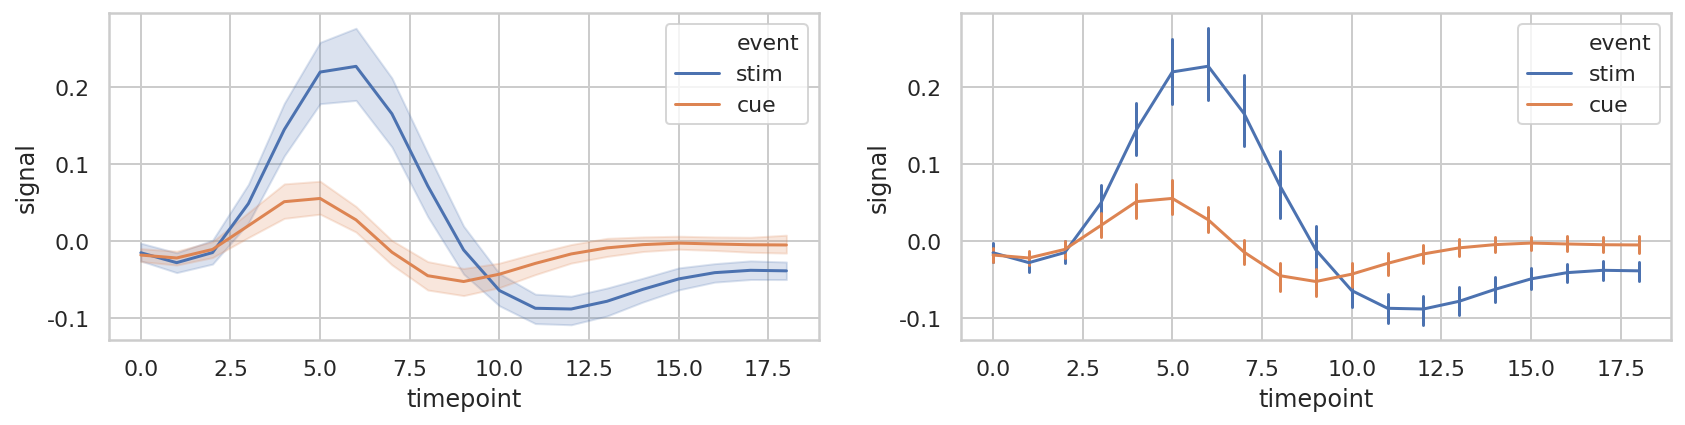

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)
fig.set_size_inches([14,3])

# err_style 옵션을 통해 각 timepoint 에서의 신뢰구간 표시하는 방식을 바꿀 수 있습니다.
sns.lineplot(data=fmri,x='timepoint', y='signal', hue='event', err_style='band', ax=ax1)
sns.lineplot(data=fmri,x='timepoint', y='signal', hue='event', err_style='bars', ax=ax2)

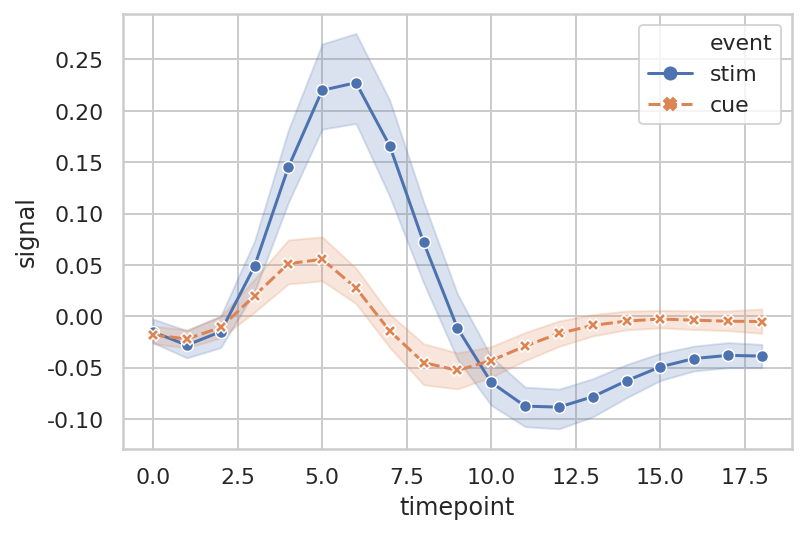

In [50]:
# markers 옵션을 사용하거나, line의 모양을 바꾸는 옵션을 사용하고 싶은 경우 style 옵션을 구분지을 변수명으로 설정해주어야 합니다.

sns.lineplot(x="timepoint", y="signal", style="event", hue='event', markers=True, data=fmri)

### scatterplot

scatterplot은 표현하고자 하는 두 변수가 모두 연속형인 경우에 사용하기 적합한 그래프입니다. 직관적으로 상관관계가 있는지 분석하는 경우 많이 사용됩니다.

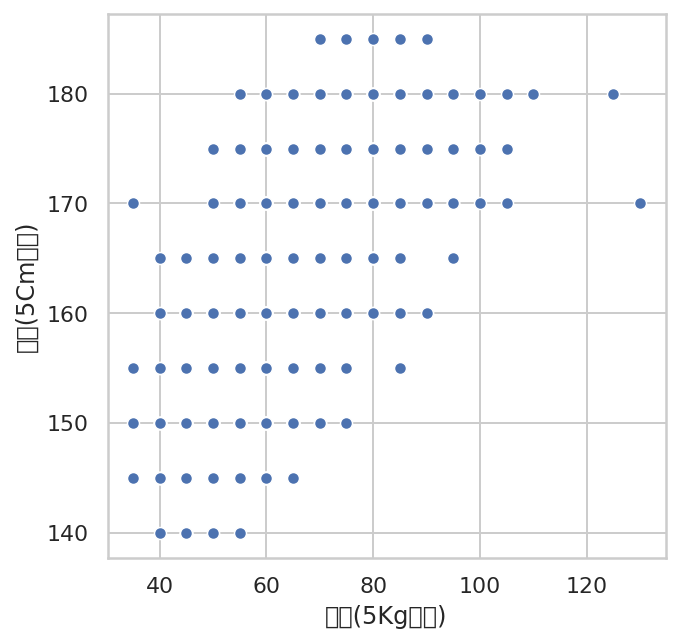

In [51]:
#scatterplot을 그려줍니다.
plt.figure(figsize=[5, 5])
sns.scatterplot(x="체중(5Kg단위)", y="신장(5Cm단위)", data=data)

신장이 큰 사람은 신장이 작은 사람보다 평균체중도 더 크다는 추론을 할 수 있습니다.

데이터 비식별화로 인해 체중과 신장이 범주형 (카테고리형) 처럼 끊어져 있는 것이 아쉽습니다.

hue 옵션을 통해 색으로 하나의 변수를 더 표현할 수 있습니다. 위에서 사용한 그래프들은 hue 옵션이 항상 카테고리형이어야했지만, scatterplot에서는 연속형이어도 사용 가능합니다.

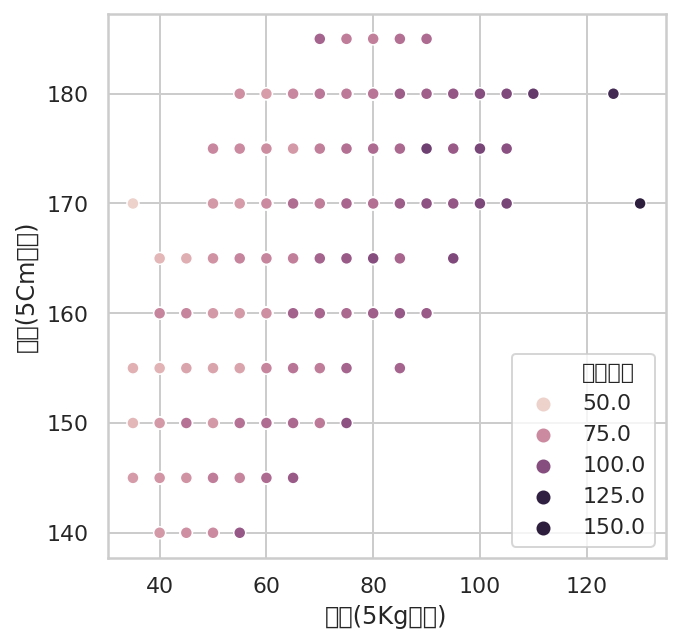

In [52]:
plt.figure(figsize=[5, 5])

#hue 옵션을 연속형 변수인 허리둘레를 이용해 표현합니다.
sns.scatterplot(x="체중(5Kg단위)", y="신장(5Cm단위)", hue="허리둘레", data=data)

체중이 많을수록 허리둘레가 두꺼워지는 것을 확인할 수 있습니다. 마찬가지로 색상이 아닌 원의 사이즈로도 허리둘레를 구분할 수 있습니다.

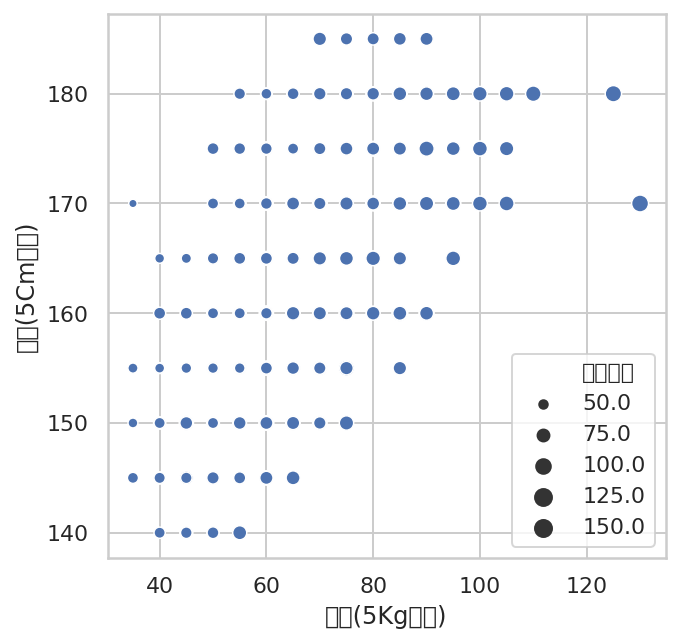

In [53]:
plt.figure(figsize=[5, 5])

#hue 옵션을 연속형 변수인 허리둘레를 이용해 표현합니다.
sns.scatterplot(x="체중(5Kg단위)", y="신장(5Cm단위)", size="허리둘레", data=data)

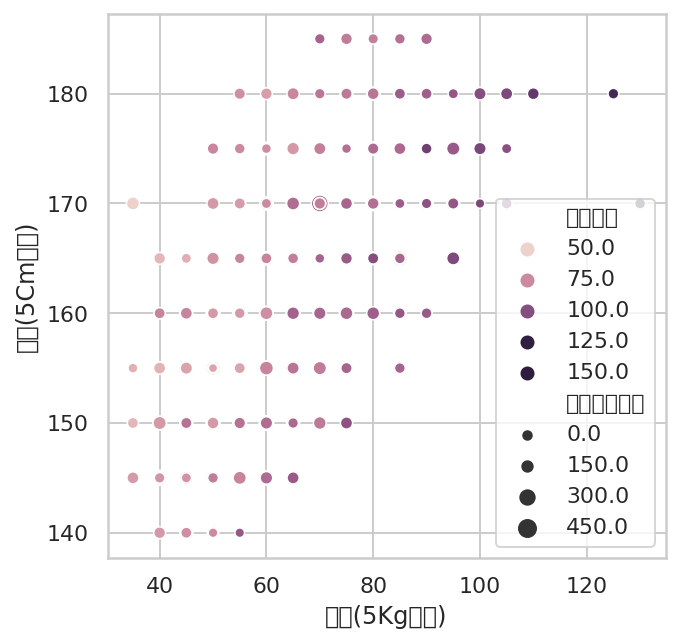

In [54]:
plt.figure(figsize=[5, 5])

#두 개의 옵션을 동시에 사용할 수도 있습니다.
sns.scatterplot(x="체중(5Kg단위)", y="신장(5Cm단위)",
                hue="허리둘레", size="총콜레스테롤",
                data=data)

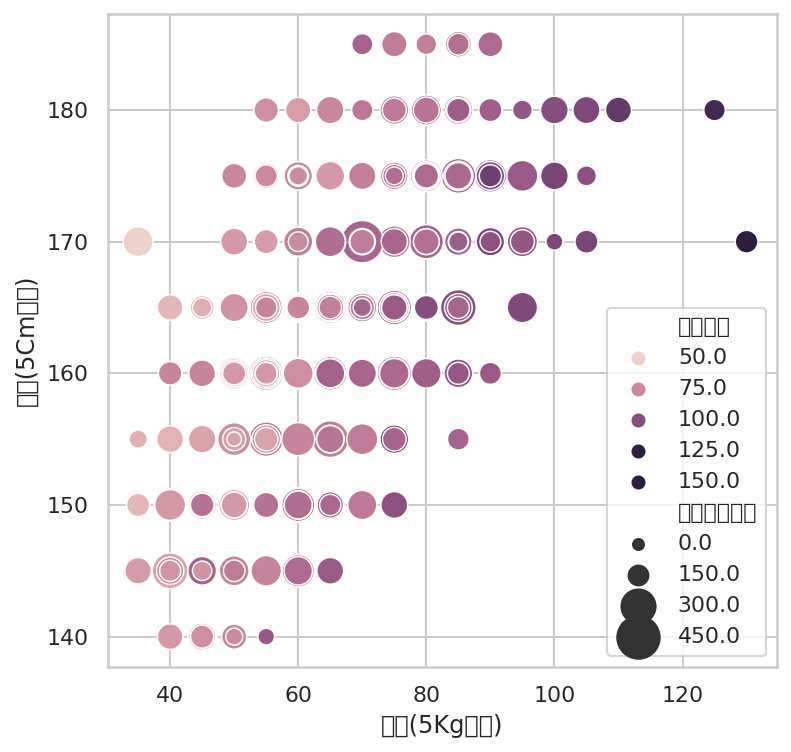

In [55]:
plt.figure(figsize=[6, 6])

# sizes 옵션을 통해 최소 원의 크기와 최대 원의 크기를 지정해줄 수 있습니다.
sns.scatterplot(x="체중(5Kg단위)", y="신장(5Cm단위)",
                hue="허리둘레", size="총콜레스테롤", sizes=(30, 450),
                data=data)

x, y가 모두 연속형인 그래프를 그려보도록 하겠습니다. 식전혈당이 높을 수록 허리둘레가 두꺼워지는 (비만인) 사람들의 비중이 높아지는 것을 확인할 수 있습니다.

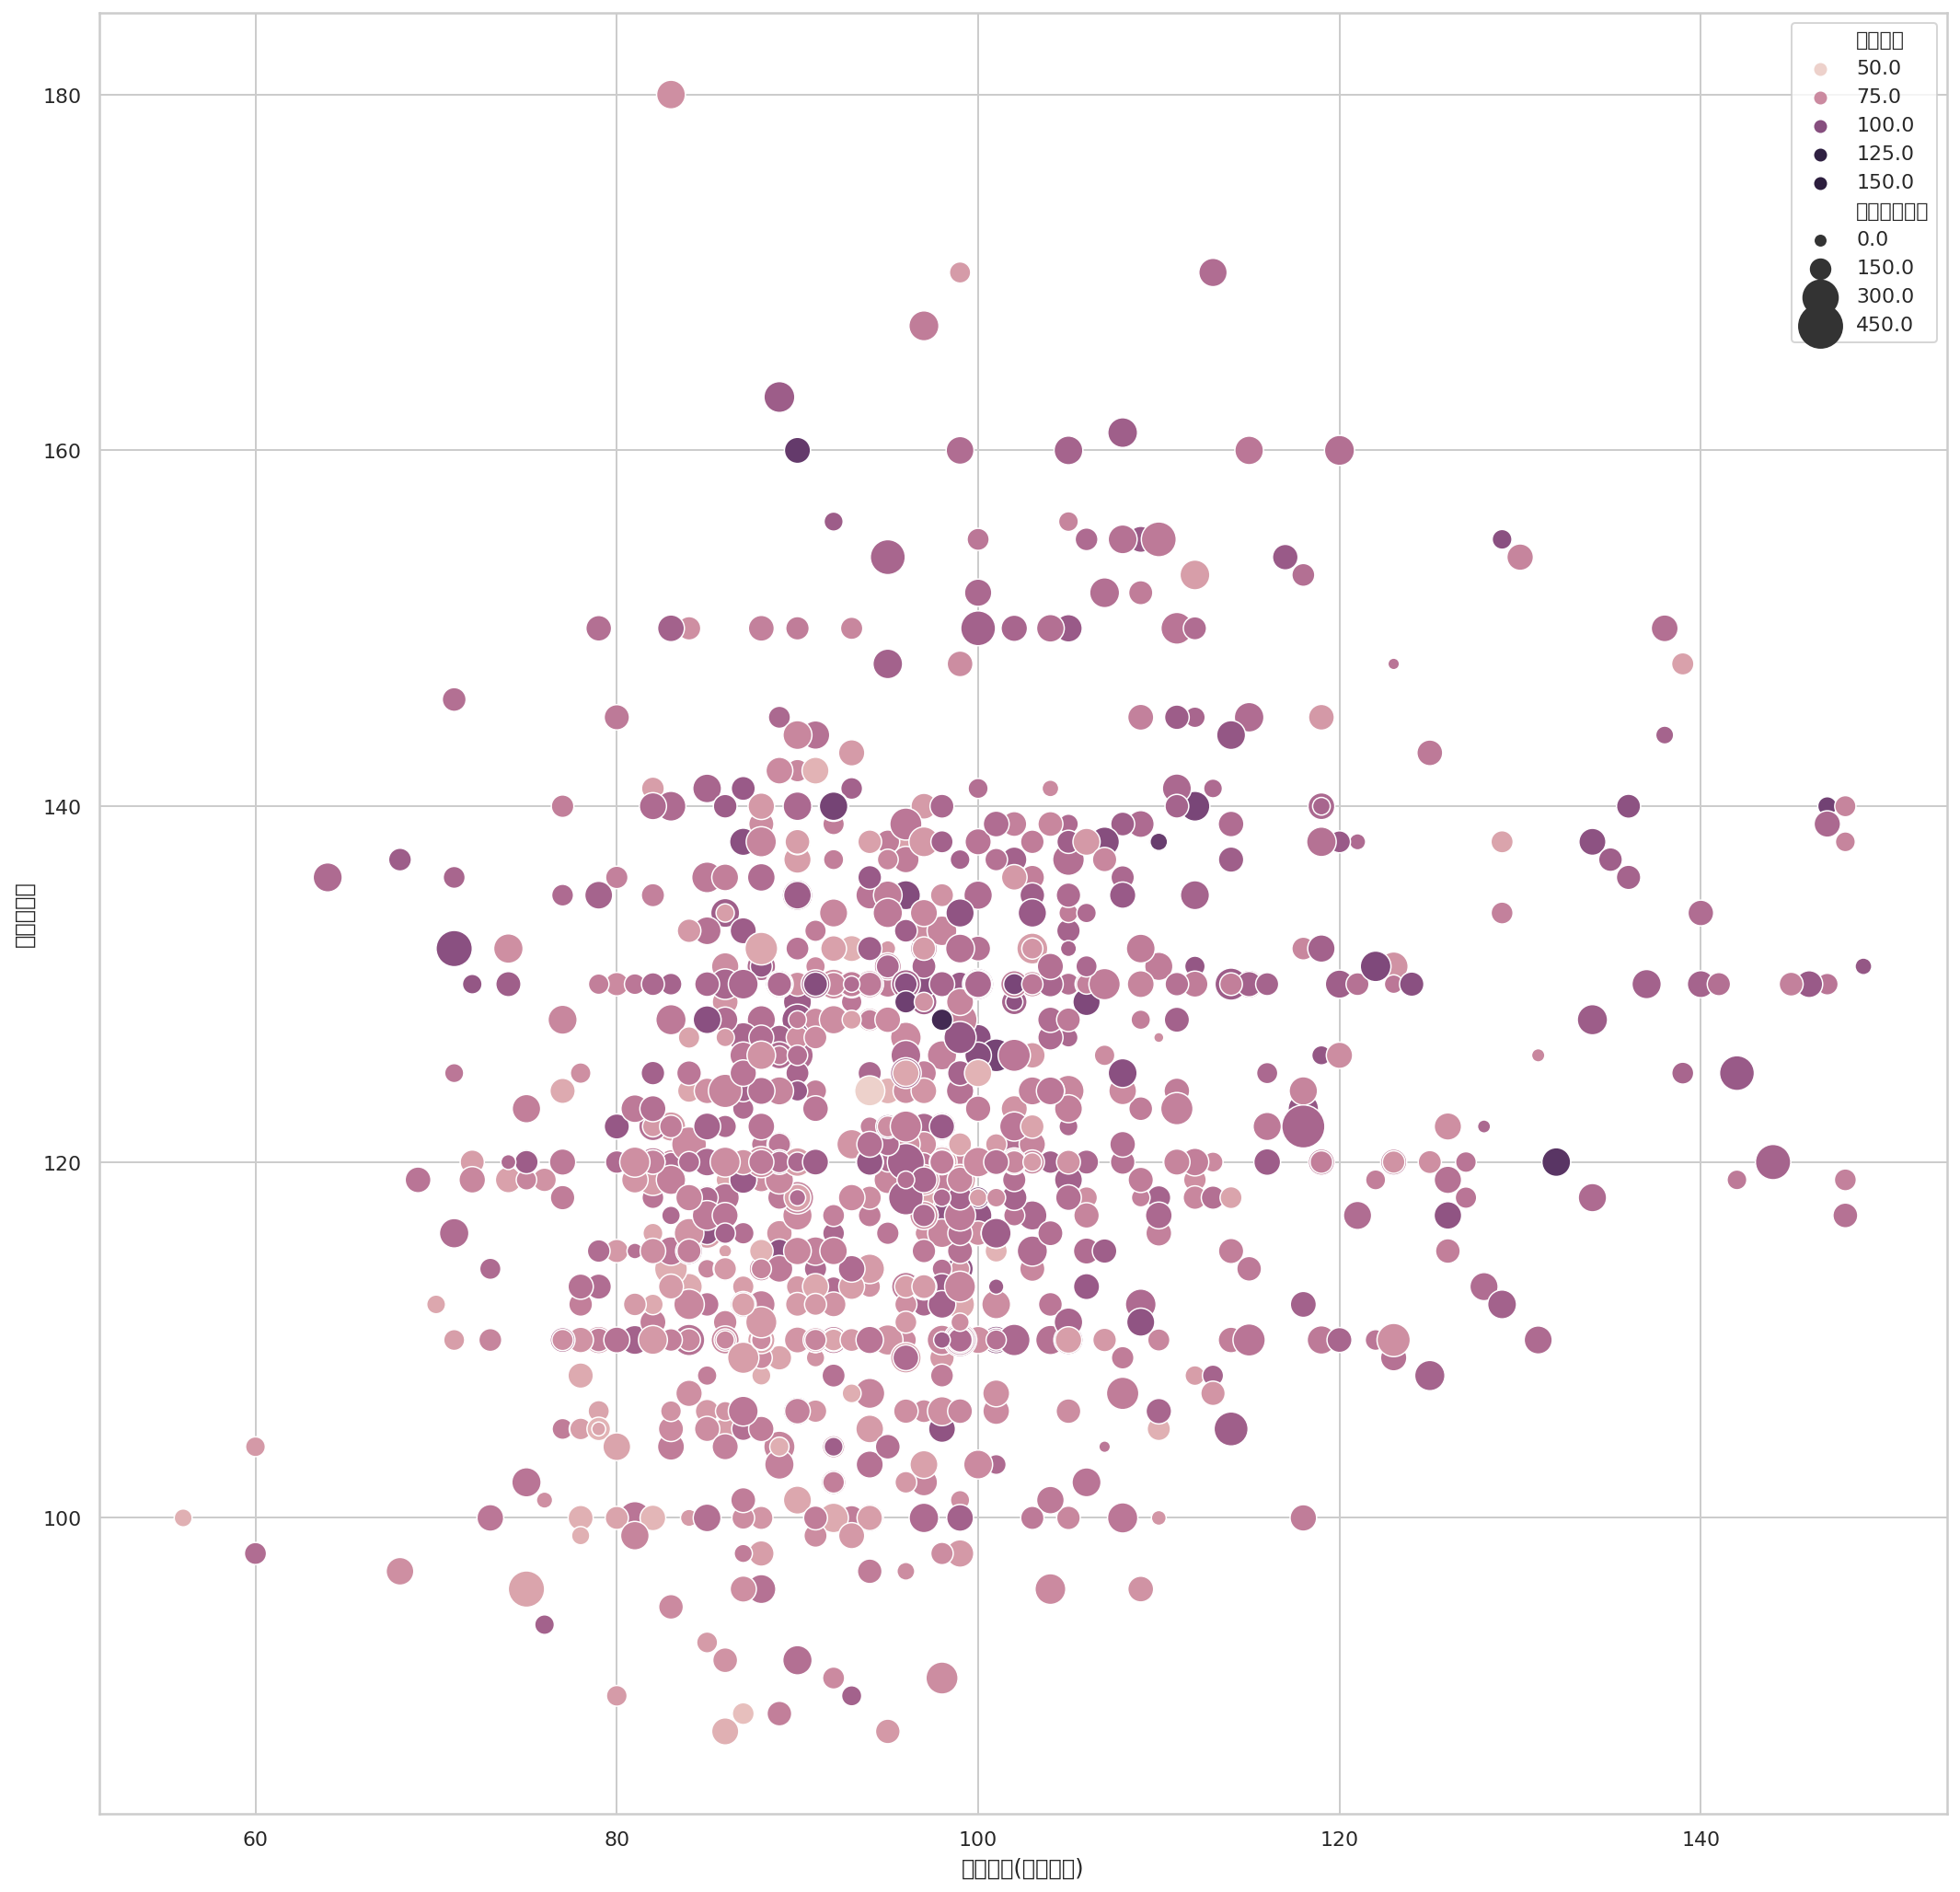

In [56]:
plt.figure(figsize=[18, 18])

sns.scatterplot(x="식전혈당(공복혈당)", y="수축기혈압",
                hue="허리둘레", size="총콜레스테롤", sizes=(30, 550),
                data=data[data['식전혈당(공복혈당)'] < 150])